## Proyecto 3

Importamos las librerias y el comando de funciones a trabajar para realizar nuestro análisis

In [1023]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import requests
import Funciones as F
import matplotlib.pyplot as plt


Comenzamos analizando el primer data frame

Los datos corresponden a la tabla de Índices nacionales (extraida de la página web del INE https://www.ine.es/dyngs/INEbase/es/) general y de grupos ECOICOP. Es la fuente oficial utilizada para medir la inflación en España y ajustar contratos, pensiones o salarios.

In [765]:
df2=pd.read_csv("50902.csv",sep=';')

In [766]:
df2

,Grupos ECOICOP,Tipo de dato,Periodo,Total
0,Índice general,Índice,2025M12,"119,942"
1,Índice general,Índice,2025M11,"119,532"
2,Índice general,Índice,2025M10,"119,301"
3,Índice general,Índice,2025M09,"118,485"
4,Índice general,Índice,2025M08,"118,824"
...,...,...,...,...
14971,12 Otros bienes y servicios,Variación en lo que va de año,2002M05,"2,9"
14972,12 Otros bienes y servicios,Variación en lo que va de año,2002M04,"2,7"
14973,12 Otros bienes y servicios,Variación en lo que va de año,2002M03,"2,5"
14974,12 Otros bienes y servicios,Variación en lo que va de año,2002M02,"2,2"


In [767]:
F.informe(df2)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Grupos ECOICOP  14976 non-null  object
 1   Tipo de dato    14976 non-null  object
 2   Periodo         14976 non-null  object
 3   Total           14976 non-null  object
dtypes: object(4)
memory usage: 468.1+ KB
None
Valores nulos:
Grupos ECOICOP    0
Tipo de dato      0
Periodo           0
Total             0
dtype: int64
Tipos de datos:
Grupos ECOICOP    object
Tipo de dato      object
Periodo           object
Total             object
dtype: object
Primeras 5 filas:
   Grupos ECOICOP Tipo de dato  Periodo    Total
0  Índice general       Índice  2025M12  119,942
1  Índice general       Índice  2025M11  119,532
2  Índice general       Índice  2025M10  119,301
3  Índice general       Índice  2025M09  118,485
4  Índice general       Índice  2025M08  118,824
Últi

In [768]:
F.columnas(df2)

Index(['Grupos ECOICOP', 'Tipo de dato', 'Periodo', 'Total'], dtype='object')
4


In [769]:
F.categorico(df2,"Grupos ECOICOP")

Grupos ECOICOP
Índice general                                                                           1152
01 Alimentos y bebidas no alcohólicas                                                    1152
02 Bebidas alcohólicas y tabaco                                                          1152
03 Vestido y calzado                                                                     1152
04 Vivienda, agua, electricidad, gas y otros combustibles                                1152
05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar    1152
06 Sanidad                                                                               1152
07 Transporte                                                                            1152
08 Comunicaciones                                                                        1152
09 Ocio y cultura                                                                        1152
10 Enseñanza                                 

filtramos por filas para nuestro estudio

In [770]:
categorias_a_mantener = ['Índice general', '01 Alimentos y bebidas no alcohólicas','05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar']


In [771]:
df2_filtrado=F.filtrar_fila(df2,'Grupos ECOICOP',categorias_a_mantener)

In [772]:
df2_filtrado

,Grupos ECOICOP,Tipo de dato,Periodo,Total
0,Índice general,Índice,2025M12,"119,942"
1,Índice general,Índice,2025M11,"119,532"
2,Índice general,Índice,2025M10,"119,301"
3,Índice general,Índice,2025M09,"118,485"
4,Índice general,Índice,2025M08,"118,824"
...,...,...,...,...
6907,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,2002M05,"1,3"
6908,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,2002M04,"0,9"
6909,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,2002M03,"0,3"
6910,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,2002M02,"-0,1"


Cambiamos la columna Periodo por dos una de año y mes separandolas 

In [773]:
F.categorico(df2_filtrado,"Periodo")

Periodo
2025M12    12
2025M11    12
2025M10    12
2025M09    12
2025M08    12
           ..
2002M05    12
2002M04    12
2002M03    12
2002M02    12
2002M01    12
Name: count, Length: 288, dtype: int64
['2025M12' '2025M11' '2025M10' '2025M09' '2025M08' '2025M07' '2025M06'
 '2025M05' '2025M04' '2025M03' '2025M02' '2025M01' '2024M12' '2024M11'
 '2024M10' '2024M09' '2024M08' '2024M07' '2024M06' '2024M05' '2024M04'
 '2024M03' '2024M02' '2024M01' '2023M12' '2023M11' '2023M10' '2023M09'
 '2023M08' '2023M07' '2023M06' '2023M05' '2023M04' '2023M03' '2023M02'
 '2023M01' '2022M12' '2022M11' '2022M10' '2022M09' '2022M08' '2022M07'
 '2022M06' '2022M05' '2022M04' '2022M03' '2022M02' '2022M01' '2021M12'
 '2021M11' '2021M10' '2021M09' '2021M08' '2021M07' '2021M06' '2021M05'
 '2021M04' '2021M03' '2021M02' '2021M01' '2020M12' '2020M11' '2020M10'
 '2020M09' '2020M08' '2020M07' '2020M06' '2020M05' '2020M04' '2020M03'
 '2020M02' '2020M01' '2019M12' '2019M11' '2019M10' '2019M09' '2019M08'
 '2019M07' '2019M0

In [774]:
df2_filtrado2=F.periodo(df2_filtrado,'Periodo')

c:\Users\tachi\Documents\git\proyecto3\Funciones.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anyo'] = df[col].str[:4].astype(int)
c:\Users\tachi\Documents\git\proyecto3\Funciones.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mes'] = df[col].str[5:].astype(int)


In [775]:
df2_filtrado2

,Grupos ECOICOP,Tipo de dato,Total,Anyo,Mes
0,Índice general,Índice,"119,942",2025,12
1,Índice general,Índice,"119,532",2025,11
2,Índice general,Índice,"119,301",2025,10
3,Índice general,Índice,"118,485",2025,9
4,Índice general,Índice,"118,824",2025,8
...,...,...,...,...,...
6907,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,"1,3",2002,5
6908,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,"0,9",2002,4
6909,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,"0,3",2002,3
6910,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,"-0,1",2002,2


In [776]:
df2_limpio2=F.cambiocoma_punto(df2_filtrado2,"Total")

Filtraremos los años de estudios que serán del 2018 a 2025

In [777]:

df2_limpio =F.año_estudio(df2_limpio2,'Anyo')

In [778]:
df2_limpio

,Grupos ECOICOP,Tipo de dato,Total,Anyo,Mes
0,Índice general,Índice,119.942,2025,12
1,Índice general,Índice,119.532,2025,11
2,Índice general,Índice,119.301,2025,10
3,Índice general,Índice,118.485,2025,9
4,Índice general,Índice,118.824,2025,8
...,...,...,...,...,...
6715,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,0.200,2018,5
6716,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,-0.100,2018,4
6717,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,-0.400,2018,3
6718,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,-0.600,2018,2


lista df2_filtrado listo para analizar y unir

In [779]:
con2=df2_limpio.groupby(['Grupos ECOICOP','Tipo de dato'])["Total"].mean().round(2).reset_index(name='Promedio_Total')

In [1035]:
con2

,Grupos ECOICOP,Tipo de dato,Promedio_Total
0,01 Alimentos y bebidas no alcohólicas,Variación anual,4.54
1,01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,2.60
2,01 Alimentos y bebidas no alcohólicas,Variación mensual,0.37
3,01 Alimentos y bebidas no alcohólicas,Índice,110.84
4,"05 Muebles, artículos del hogar y artículos pa...",Variación anual,1.87
5,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,0.87
6,"05 Muebles, artículos del hogar y artículos pa...",Variación mensual,0.16
7,"05 Muebles, artículos del hogar y artículos pa...",Índice,104.96
8,Índice general,Variación anual,2.82
9,Índice general,Variación en lo que va de año,1.45


filtramos esta tabla 

In [1045]:
tipos_deseados = ['Variación mensual', 'Variación anual']

In [1046]:
con3=F.filtrar_fila(df2_limpio,'Tipo de dato',tipos_deseados)

In [1047]:
con3

,Grupos ECOICOP,Tipo de dato,Total,Anyo,Mes
288,Índice general,Variación mensual,0.3,2025,12
289,Índice general,Variación mensual,0.2,2025,11
290,Índice general,Variación mensual,0.7,2025,10
291,Índice general,Variación mensual,-0.3,2025,9
292,Índice general,Variación mensual,0.0,2025,8
...,...,...,...,...,...
6427,"05 Muebles, artículos del hogar y artículos pa...",Variación anual,0.1,2018,5
6428,"05 Muebles, artículos del hogar y artículos pa...",Variación anual,0.1,2018,4
6429,"05 Muebles, artículos del hogar y artículos pa...",Variación anual,0.0,2018,3
6430,"05 Muebles, artículos del hogar y artículos pa...",Variación anual,0.0,2018,2


In [1048]:
con4=con3.groupby(['Grupos ECOICOP','Tipo de dato'])["Total"].mean().round(2).reset_index(name='Promedio_Total')

In [1049]:
con4

,Grupos ECOICOP,Tipo de dato,Promedio_Total
0,01 Alimentos y bebidas no alcohólicas,Variación anual,4.54
1,01 Alimentos y bebidas no alcohólicas,Variación mensual,0.37
2,"05 Muebles, artículos del hogar y artículos pa...",Variación anual,1.87
3,"05 Muebles, artículos del hogar y artículos pa...",Variación mensual,0.16
4,Índice general,Variación anual,2.82
5,Índice general,Variación mensual,0.23


C:\Users\tachi\AppData\Local\Temp\ipykernel_16476\319540466.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


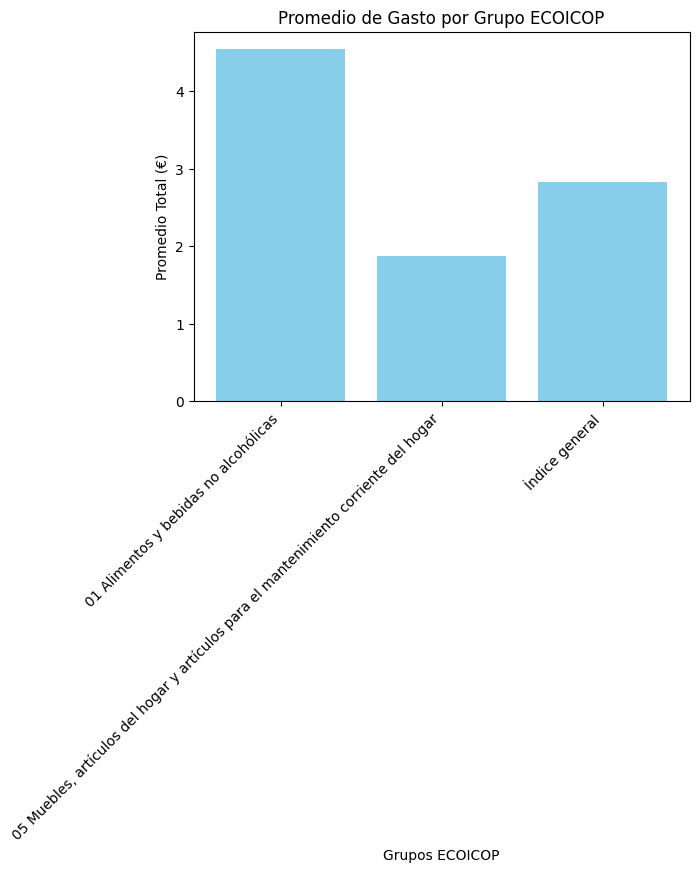

In [1051]:

plt.bar(con4['Grupos ECOICOP'], con4['Promedio_Total'], color='skyblue')

# 3. Personalización del gráfico
plt.xlabel('Grupos ECOICOP')
plt.ylabel("Promedio Total (€)")
plt.title('Promedio de Gasto por Grupo ECOICOP')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Veamos el data frame que contiene datos del IPC (Índice de Precios de Consumo) Que proviene del ISTAC (Instituto Canario de Estadística).


In [781]:
df3=pd.read_csv("ipc-por-grupos-de-gasto-base-2021.csv",sep=";", encoding="latin-1")
df3.head()

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,2002,Índice Precios de Consumo de las comunicaciones,Otros,NaN,NaN,121.864,Índice,NaN
1,2002,Índice Precios de Consumo del ocio y la cultura,Otros,NaN,NaN,99.137,Índice,NaN
2,2002,Índice Precios de Consumo de las bebidas alcoh...,Otros,NaN,NaN,46.883,Índice,NaN
3,2002,Índice Precios de Consumo de los alimentos y l...,Otros,NaN,NaN,67.976,Índice,NaN
4,2002,"Índice Precios de Consumo de muebles, artículo...",Otros,NaN,NaN,81.978,Índice,NaN


In [782]:
df3

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato
0,2002,Índice Precios de Consumo de las comunicaciones,Otros,NaN,NaN,121.864,Índice,NaN
1,2002,Índice Precios de Consumo del ocio y la cultura,Otros,NaN,NaN,99.137,Índice,NaN
2,2002,Índice Precios de Consumo de las bebidas alcoh...,Otros,NaN,NaN,46.883,Índice,NaN
3,2002,Índice Precios de Consumo de los alimentos y l...,Otros,NaN,NaN,67.976,Índice,NaN
4,2002,"Índice Precios de Consumo de muebles, artículo...",Otros,NaN,NaN,81.978,Índice,NaN
...,...,...,...,...,...,...,...,...
294,2024,Índice Precios de Consumo del vestido y el cal...,Otros,NaN,NaN,105.560,Índice,NaN
295,2024,"Índice Precios de Consumo de vivienda, agua, e...",Otros,NaN,NaN,105.341,Índice,NaN
296,2024,"Índice Precios de Consumo de muebles, artículo...",Otros,NaN,NaN,111.496,Índice,NaN
297,2024,Índice Precios de Consumo de sanidad,Otros,NaN,NaN,101.759,Índice,NaN


In [783]:
F.informe(df3)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                299 non-null    int64  
 1   Concepto           299 non-null    object 
 2   Tipo territorio    299 non-null    object 
 3   Código territorio  0 non-null      float64
 4   Territorio         0 non-null      float64
 5   Valor              299 non-null    float64
 6   Unidad             299 non-null    object 
 7   Estado dato        0 non-null      float64
dtypes: float64(4), int64(1), object(3)
memory usage: 18.8+ KB
None
Valores nulos:
Año                    0
Concepto               0
Tipo territorio        0
Código territorio    299
Territorio           299
Valor                  0
Unidad                 0
Estado dato          299
dtype: int64
Tipos de datos:
Año                    int64
Concepto              object
Tipo territorio    

muchos datos nulos veremos la columna código territorio

In [784]:
F.categorico(df3,'Código territorio')

Series([], Name: count, dtype: int64)
[nan]
0


In [785]:
F.categorico(df3,'Tipo territorio')

Tipo territorio
Otros    299
Name: count, dtype: int64
['Otros']
1


In [786]:
F.categorico(df3,'Unidad')

Unidad
Índice    299
Name: count, dtype: int64
['Índice']
1


No la consideramos para el df

In [787]:
df_reducido = df3[['Año','Concepto', 'Valor']]

In [788]:
df_reducido.head()

,Año,Concepto,Valor
0,2002,Índice Precios de Consumo de las comunicaciones,121.864
1,2002,Índice Precios de Consumo del ocio y la cultura,99.137
2,2002,Índice Precios de Consumo de las bebidas alcoh...,46.883
3,2002,Índice Precios de Consumo de los alimentos y l...,67.976
4,2002,"Índice Precios de Consumo de muebles, artículo...",81.978


In [789]:
F.informe(df_reducido)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Año       299 non-null    int64  
 1   Concepto  299 non-null    object 
 2   Valor     299 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.1+ KB
None
Valores nulos:
Año         0
Concepto    0
Valor       0
dtype: int64
Tipos de datos:
Año           int64
Concepto     object
Valor       float64
dtype: object
Primeras 5 filas:
    Año                                           Concepto    Valor
0  2002    Índice Precios de Consumo de las comunicaciones  121.864
1  2002    Índice Precios de Consumo del ocio y la cultura   99.137
2  2002  Índice Precios de Consumo de las bebidas alcoh...   46.883
3  2002  Índice Precios de Consumo de los alimentos y l...   67.976
4  2002  Índice Precios de Consumo de muebles, artículo...   81.978
Últimas 5 filas:
    

Cambiamos el nombre de la columna Año para unir a las otros Data frame

In [790]:
df_reducido=df_reducido.rename(columns={"Año":"Anyo"})

In [791]:
df_reducido

,Anyo,Concepto,Valor
0,2002,Índice Precios de Consumo de las comunicaciones,121.864
1,2002,Índice Precios de Consumo del ocio y la cultura,99.137
2,2002,Índice Precios de Consumo de las bebidas alcoh...,46.883
3,2002,Índice Precios de Consumo de los alimentos y l...,67.976
4,2002,"Índice Precios de Consumo de muebles, artículo...",81.978
...,...,...,...
294,2024,Índice Precios de Consumo del vestido y el cal...,105.560
295,2024,"Índice Precios de Consumo de vivienda, agua, e...",105.341
296,2024,"Índice Precios de Consumo de muebles, artículo...",111.496
297,2024,Índice Precios de Consumo de sanidad,101.759


Filtraremos por año de estudio que es 2018 a 2025

In [792]:

df3_limpio = F.año_estudio(df_reducido,'Anyo')

In [793]:
df3_limpio=F.cambiocoma_punto(df3_limpio,'Valor')

c:\Users\tachi\Documents\git\proyecto3\Funciones.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace(',', '.', regex=False).astype(float)


In [794]:
df3_limpio

,Anyo,Concepto,Valor
208,2018,Índice Precios de Consumo del ocio y la cultura,99.751
209,2018,Índice Precios de Consumo de las comunicaciones,102.977
210,2018,Índice Precios de Consumo del transporte,94.710
211,2018,Índice Precios de Consumo de sanidad,99.681
212,2018,"Índice Precios de Consumo de muebles, artículo...",98.212
...,...,...,...
294,2024,Índice Precios de Consumo del vestido y el cal...,105.560
295,2024,"Índice Precios de Consumo de vivienda, agua, e...",105.341
296,2024,"Índice Precios de Consumo de muebles, artículo...",111.496
297,2024,Índice Precios de Consumo de sanidad,101.759


hacemos que los conceptos letras

In [795]:
df3_limpio=F.espacios(df3_limpio,'Concepto')

c:\Users\tachi\Documents\git\proyecto3\Funciones.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.strip()


In [796]:
F.categorico(df3_limpio,"Concepto")

Concepto
Índice Precios de Consumo del ocio y la cultura                                                                    7
Índice Precios de Consumo de las comunicaciones                                                                    7
Índice Precios de Consumo del transporte                                                                           7
Índice Precios de Consumo de sanidad                                                                               7
Índice Precios de Consumo de muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar    7
Índice Precios de Consumo de vivienda, agua, electricidad, gas y otros combustibles                                7
Índice Precios de Consumo del vestido y el calzado                                                                 7
Índice Precios de Consumo de las bebidas alcohólicas y el tabaco                                                   7
Índice Precios de Consumo de los alimentos y las bebida

In [797]:
df3limpio=df3_limpio.rename(columns={'Concepto': 'Grupos ECOICOP'})



In [798]:
df3limpio=df3limpio.rename(columns={'Valor': 'Valor_istac'})

In [799]:
df3limpio.head()

,Anyo,Grupos ECOICOP,Valor_istac
208,2018,Índice Precios de Consumo del ocio y la cultura,99.751
209,2018,Índice Precios de Consumo de las comunicaciones,102.977
210,2018,Índice Precios de Consumo del transporte,94.710
211,2018,Índice Precios de Consumo de sanidad,99.681
212,2018,"Índice Precios de Consumo de muebles, artículo...",98.212


In [800]:

data=F.cambiar_filas(df3limpio,'Grupos ECOICOP','Índice general de Precios de Consumo',"Índice general")  

In [801]:
frame=F.cambiar_filas(data,'Grupos ECOICOP','Índice Precios de Consumo de los alimentos y las bebidas no alcohólicas',"01 Alimentos y bebidas no alcohólicas")

In [820]:
df3_limpios2=F.cambiar_filas(frame,'Grupos ECOICOP','Índice Precios de Consumo de muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar',"05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar")

In [821]:
F.categorico(df3_limpios2,"Grupos ECOICOP")

Grupos ECOICOP
Índice Precios de Consumo del ocio y la cultura                                          7
Índice Precios de Consumo de las comunicaciones                                          7
Índice Precios de Consumo del transporte                                                 7
Índice Precios de Consumo de sanidad                                                     7
05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar    7
Índice Precios de Consumo de vivienda, agua, electricidad, gas y otros combustibles      7
Índice Precios de Consumo del vestido y el calzado                                       7
Índice Precios de Consumo de las bebidas alcohólicas y el tabaco                         7
01 Alimentos y bebidas no alcohólicas                                                    7
Índice general                                                                           7
Índice Precios de Consumo de otros bienes y servicios                      

In [822]:
df3_limpios=F.espacios(df3_limpios2,"Grupos ECOICOP")

In [823]:
df3_limpios


,Anyo,Grupos ECOICOP,Valor_istac
208,2018,Índice Precios de Consumo del ocio y la cultura,99.751
209,2018,Índice Precios de Consumo de las comunicaciones,102.977
210,2018,Índice Precios de Consumo del transporte,94.710
211,2018,Índice Precios de Consumo de sanidad,99.681
212,2018,"05 Muebles, artículos del hogar y artículos pa...",98.212
...,...,...,...
294,2024,Índice Precios de Consumo del vestido y el cal...,105.560
295,2024,"Índice Precios de Consumo de vivienda, agua, e...",105.341
296,2024,"05 Muebles, artículos del hogar y artículos pa...",111.496
297,2024,Índice Precios de Consumo de sanidad,101.759


listo df_reducido limpio listo para analizar

Estos datos corresponden al Índice de Precios de Consumo (IPC) en España y han sido extraídos de las estadísticas oficiales del Instituto Nacional de Estadística (INE). 

In [806]:
df4=pd.read_csv("50913.csv",sep=";")


In [807]:
df4

,Comunidades y Ciudades Autónomas,Grupos ECOICOP,Tipo de dato,Periodo,Total
0,Nacional,Índice general,Índice,2025M12,"119,942"
1,Nacional,Índice general,Índice,2025M11,"119,532"
2,Nacional,Índice general,Índice,2025M10,"119,301"
3,Nacional,Índice general,Índice,2025M09,"118,485"
4,Nacional,Índice general,Índice,2025M08,"118,824"
...,...,...,...,...,...
299515,19 Melilla,12 Otros bienes y servicios,Variación en lo que va de año,2002M05,"2,3"
299516,19 Melilla,12 Otros bienes y servicios,Variación en lo que va de año,2002M04,"1,9"
299517,19 Melilla,12 Otros bienes y servicios,Variación en lo que va de año,2002M03,"1,9"
299518,19 Melilla,12 Otros bienes y servicios,Variación en lo que va de año,2002M02,"1,7"


In [808]:
F.informe(df4)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299520 entries, 0 to 299519
Data columns (total 5 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Comunidades y Ciudades Autónomas  299520 non-null  object
 1   Grupos ECOICOP                    299520 non-null  object
 2   Tipo de dato                      299520 non-null  object
 3   Periodo                           299520 non-null  object
 4   Total                             298836 non-null  object
dtypes: object(5)
memory usage: 11.4+ MB
None
Valores nulos:
Comunidades y Ciudades Autónomas      0
Grupos ECOICOP                        0
Tipo de dato                          0
Periodo                               0
Total                               684
dtype: int64
Tipos de datos:
Comunidades y Ciudades Autónomas    object
Grupos ECOICOP                      object
Tipo de dato                        object
Per

In [824]:
F.categorico(df4,"Comunidades y Ciudades Autónomas")

Comunidades y Ciudades Autónomas
Nacional                          14976
01 Andalucía                      14976
02 Aragón                         14976
03 Asturias, Principado de        14976
04 Balears, Illes                 14976
05 Canarias                       14976
06 Cantabria                      14976
07 Castilla y León                14976
08 Castilla - La Mancha           14976
09 Cataluña                       14976
10 Comunitat Valenciana           14976
11 Extremadura                    14976
12 Galicia                        14976
13 Madrid, Comunidad de           14976
14 Murcia, Región de              14976
15 Navarra, Comunidad Foral de    14976
16 País Vasco                     14976
17 Rioja, La                      14976
18 Ceuta                          14976
19 Melilla                        14976
Name: count, dtype: int64
['Nacional' '01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '

consideramos las filas que contienen Madrid y Nacional para nuestro análisis

In [825]:
lista=["13 Madrid, Comunidad de"]

In [826]:
df4_in=F.filtrar_fila(df4,'Comunidades y Ciudades Autónomas',lista)

In [827]:
df4_in

,Comunidades y Ciudades Autónomas,Grupos ECOICOP,Tipo de dato,Periodo,Total
194688,"13 Madrid, Comunidad de",Índice general,Índice,2025M12,"119,383"
194689,"13 Madrid, Comunidad de",Índice general,Índice,2025M11,"118,712"
194690,"13 Madrid, Comunidad de",Índice general,Índice,2025M10,"118,567"
194691,"13 Madrid, Comunidad de",Índice general,Índice,2025M09,"117,639"
194692,"13 Madrid, Comunidad de",Índice general,Índice,2025M08,"117,280"
...,...,...,...,...,...
209659,"13 Madrid, Comunidad de",12 Otros bienes y servicios,Variación en lo que va de año,2002M05,"3,0"
209660,"13 Madrid, Comunidad de",12 Otros bienes y servicios,Variación en lo que va de año,2002M04,"2,8"
209661,"13 Madrid, Comunidad de",12 Otros bienes y servicios,Variación en lo que va de año,2002M03,"2,7"
209662,"13 Madrid, Comunidad de",12 Otros bienes y servicios,Variación en lo que va de año,2002M02,"2,4"


In [813]:
F.categorico(df4_in,"Grupos ECOICOP")

Grupos ECOICOP
Índice general                                                                           1152
01 Alimentos y bebidas no alcohólicas                                                    1152
02 Bebidas alcohólicas y tabaco                                                          1152
03 Vestido y calzado                                                                     1152
04 Vivienda, agua, electricidad, gas y otros combustibles                                1152
05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar    1152
06 Sanidad                                                                               1152
07 Transporte                                                                            1152
08 Comunicaciones                                                                        1152
09 Ocio y cultura                                                                        1152
10 Enseñanza                                 

Filtramos filas de nuestro estudio

In [814]:
mantener=["Índice general","01 Alimentos y bebidas no alcohólicas","05 Mobiliario, equipamiento del hogar y gastos corrientes de conservación de la vivienda"]

In [815]:
df4_limpio=F.filtrar_fila(df4_in,'Grupos ECOICOP',mantener)

In [816]:
df4_limpio.head()

,Comunidades y Ciudades Autónomas,Grupos ECOICOP,Tipo de dato,Periodo,Total
194688,"13 Madrid, Comunidad de",Índice general,Índice,2025M12,"119,383"
194689,"13 Madrid, Comunidad de",Índice general,Índice,2025M11,"118,712"
194690,"13 Madrid, Comunidad de",Índice general,Índice,2025M10,"118,567"
194691,"13 Madrid, Comunidad de",Índice general,Índice,2025M09,"117,639"
194692,"13 Madrid, Comunidad de",Índice general,Índice,2025M08,"117,280"


separamos la columna periodo en dos columnas año y mes

In [828]:
df4_limpio2=F.periodo(df4_limpio,'Periodo')

c:\Users\tachi\Documents\git\proyecto3\Funciones.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anyo'] = df[col].str[:4].astype(int)
c:\Users\tachi\Documents\git\proyecto3\Funciones.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mes'] = df[col].str[5:].astype(int)


In [829]:
df4_limpio2

,Comunidades y Ciudades Autónomas,Grupos ECOICOP,Tipo de dato,Total,Anyo,Mes
194688,"13 Madrid, Comunidad de",Índice general,Índice,"119,383",2025,12
194689,"13 Madrid, Comunidad de",Índice general,Índice,"118,712",2025,11
194690,"13 Madrid, Comunidad de",Índice general,Índice,"118,567",2025,10
194691,"13 Madrid, Comunidad de",Índice general,Índice,"117,639",2025,9
194692,"13 Madrid, Comunidad de",Índice general,Índice,"117,280",2025,8
...,...,...,...,...,...,...
196987,"13 Madrid, Comunidad de",01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,"1,7",2002,5
196988,"13 Madrid, Comunidad de",01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,"1,2",2002,4
196989,"13 Madrid, Comunidad de",01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,"0,5",2002,3
196990,"13 Madrid, Comunidad de",01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,"0,2",2002,2


Renombramos las columnas

In [830]:
df4_limpio2=df4_limpio2.rename(columns={"Comunidades y Ciudades Autónomas":"Comunidad autónoma"})

In [831]:
df4_limpio2

,Comunidad autónoma,Grupos ECOICOP,Tipo de dato,Total,Anyo,Mes
194688,"13 Madrid, Comunidad de",Índice general,Índice,"119,383",2025,12
194689,"13 Madrid, Comunidad de",Índice general,Índice,"118,712",2025,11
194690,"13 Madrid, Comunidad de",Índice general,Índice,"118,567",2025,10
194691,"13 Madrid, Comunidad de",Índice general,Índice,"117,639",2025,9
194692,"13 Madrid, Comunidad de",Índice general,Índice,"117,280",2025,8
...,...,...,...,...,...,...
196987,"13 Madrid, Comunidad de",01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,"1,7",2002,5
196988,"13 Madrid, Comunidad de",01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,"1,2",2002,4
196989,"13 Madrid, Comunidad de",01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,"0,5",2002,3
196990,"13 Madrid, Comunidad de",01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,"0,2",2002,2


Filtramos por años de estudio de 2018 a 2025

In [832]:
df4_limpios = F.año_estudio(df4_limpio2,'Anyo')

In [833]:
df4_limpios

,Comunidad autónoma,Grupos ECOICOP,Tipo de dato,Total,Anyo,Mes
194688,"13 Madrid, Comunidad de",Índice general,Índice,"119,383",2025,12
194689,"13 Madrid, Comunidad de",Índice general,Índice,"118,712",2025,11
194690,"13 Madrid, Comunidad de",Índice general,Índice,"118,567",2025,10
194691,"13 Madrid, Comunidad de",Índice general,Índice,"117,639",2025,9
194692,"13 Madrid, Comunidad de",Índice general,Índice,"117,280",2025,8
...,...,...,...,...,...,...
196795,"13 Madrid, Comunidad de",01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,"1,2",2018,5
196796,"13 Madrid, Comunidad de",01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,"0,3",2018,4
196797,"13 Madrid, Comunidad de",01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,"0,2",2018,3
196798,"13 Madrid, Comunidad de",01 Alimentos y bebidas no alcohólicas,Variación en lo que va de año,"0,1",2018,2


data frame limpio df4_limpio

Estos datos son tomados por la Encuesta de Presupuestos Familiares (EPF) (https://web.comunidad.madrid/iestadis/fijas/estructu/sociales/encuesta_presupuestos_familiares), publicada anualmente por el Instituto Nacional de Estadística (INE).Representa el Gasto Monetario Total anual de los hogares.

In [834]:
df6_in=pd.read_csv("72956.csv",sep=";")
df6_in.head()

,Comunidad autónoma,Divisiones COICOP,Año,Total
0,Andalucía,01. Alimentos y bebidas no alcohólicas,2016,14.654.495
1,Andalucía,01. Alimentos y bebidas no alcohólicas,2017,14.880.229
2,Andalucía,01. Alimentos y bebidas no alcohólicas,2018,15.442.791
3,Andalucía,01. Alimentos y bebidas no alcohólicas,2019,15.817.158
4,Andalucía,01. Alimentos y bebidas no alcohólicas,2020,16.729.772


In [835]:
df6_in

,Comunidad autónoma,Divisiones COICOP,Año,Total
0,Andalucía,01. Alimentos y bebidas no alcohólicas,2016,14.654.495
1,Andalucía,01. Alimentos y bebidas no alcohólicas,2017,14.880.229
2,Andalucía,01. Alimentos y bebidas no alcohólicas,2018,15.442.791
3,Andalucía,01. Alimentos y bebidas no alcohólicas,2019,15.817.158
4,Andalucía,01. Alimentos y bebidas no alcohólicas,2020,16.729.772
...,...,...,...,...
2235,TOTAL NACIONAL,P.4. Consumo final efectivo de los hogares,2018,836.030.000
2236,TOTAL NACIONAL,P.4. Consumo final efectivo de los hogares,2019,858.434.000
2237,TOTAL NACIONAL,P.4. Consumo final efectivo de los hogares,2020,781.200.000
2238,TOTAL NACIONAL,P.4. Consumo final efectivo de los hogares,2021,850.832.000


In [836]:
F.informe(df6_in)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Comunidad autónoma  2240 non-null   object
 1   Divisiones COICOP   2240 non-null   object
 2   Año                 2240 non-null   object
 3   Total               2240 non-null   object
dtypes: object(4)
memory usage: 70.1+ KB
None
Valores nulos:
Comunidad autónoma    0
Divisiones COICOP     0
Año                   0
Total                 0
dtype: int64
Tipos de datos:
Comunidad autónoma    object
Divisiones COICOP     object
Año                   object
Total                 object
dtype: object
Primeras 5 filas:
  Comunidad autónoma                       Divisiones COICOP   Año       Total
0          Andalucía  01. Alimentos y bebidas no alcohólicas  2016  14.654.495
1          Andalucía  01. Alimentos y bebidas no alcohólicas  2017  14.880.229
2       

In [553]:
F.categorico(df6_in,"Comunidad autónoma")

Comunidad autónoma
Andalucía                       112
Aragón                          112
Asturias (Principado de)        112
Balears (Illes)                 112
Canarias                        112
Cantabria                       112
Castilla y León                 112
Castilla - La Mancha            112
Cataluña                        112
Comunitat Valenciana            112
Extremadura                     112
Galicia                         112
Madrid (Comunidad de)           112
Murcia (Región de)              112
Navarra (Comunidad Foral de)    112
País Vasco                      112
Rioja (La)                      112
Ceuta                           112
Melilla                         112
TOTAL NACIONAL                  112
Name: count, dtype: int64
['Andalucía' 'Aragón' 'Asturias (Principado de)' 'Balears (Illes)'
 'Canarias' 'Cantabria' 'Castilla y León' 'Castilla - La Mancha'
 'Cataluña' 'Comunitat Valenciana' 'Extremadura' 'Galicia'
 'Madrid (Comunidad de)' 'Murcia (Región de)

Filtramos filas de nuestro estudio

In [837]:
men=["Madrid (Comunidad de)"]
df6=F.filtrar_fila(df6_in,'Comunidad autónoma',men)

In [838]:
df6

,Comunidad autónoma,Divisiones COICOP,Año,Total
1344,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2016,11.048.172
1345,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2017,11.157.953
1346,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2018,11.842.589
1347,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2019,12.207.260
1348,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2020,13.319.939
...,...,...,...,...
1451,Madrid (Comunidad de),P.4. Consumo final efectivo de los hogares,2018,139.465.254
1452,Madrid (Comunidad de),P.4. Consumo final efectivo de los hogares,2019,144.828.929
1453,Madrid (Comunidad de),P.4. Consumo final efectivo de los hogares,2020,129.093.781
1454,Madrid (Comunidad de),P.4. Consumo final efectivo de los hogares,2021,139.779.021


In [839]:
F.categorico(df6,"Divisiones COICOP")

Divisiones COICOP
01. Alimentos y bebidas no alcohólicas                                                       7
02. Bebidas alcohólicas, tabaco y narcóticos                                                 7
03. Artículos de vestir y calzado                                                            7
04. Vivienda, agua, electricidad, gas y otros combustibles                                   7
05. Mobiliario, equipamiento del hogar y gastos corrientes de conservación de la vivienda    7
06. Salud                                                                                    7
07. Transporte                                                                               7
08. Información y comunicación                                                               7
09. Ocio, deporte y cultura                                                                  7
10. Servicios para la educación                                                              7
11. Restaurantes y servicios de 

Filtramos las filas de estudio

In [840]:
mant=["01. Alimentos y bebidas no alcohólicas","05. Mobiliario, equipamiento del hogar y gastos corrientes de conservación de la vivienda", "Total gasto en consumo final de los hogares interior", "P.3. Gasto en consumo final de los hogares", "P.4. Consumo final efectivo de los hogares"]
df6_limpio1=F.filtrar_fila(df6,'Divisiones COICOP',mant)

In [841]:
df6_limpio1

,Comunidad autónoma,Divisiones COICOP,Año,Total
1344,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2016,11.048.172
1345,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2017,11.157.953
1346,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2018,11.842.589
1347,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2019,12.207.260
1348,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2020,13.319.939
1349,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2021,13.130.024
1350,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2022 (P),13.820.927
1372,Madrid (Comunidad de),"05. Mobiliario, equipamiento del hogar y gasto...",2016,5.116.888
1373,Madrid (Comunidad de),"05. Mobiliario, equipamiento del hogar y gasto...",2017,5.272.698
1374,Madrid (Comunidad de),"05. Mobiliario, equipamiento del hogar y gasto...",2018,5.401.037


Cambiamos los nombres de las columnas para que coincidan con el resto de data frames

In [842]:
df6_limpio2=df6_limpio1.rename(columns={"Divisiones COICOP":"Grupos ECOICOP"})

In [843]:
df6_limpios=df6_limpio2.rename(columns={"Año":"Anyo"})

limpiamos los parentesis de los años con la función eliminarletras

In [844]:
df6_limpios1=F.eliminarletras(df6_limpios,'Anyo')

In [845]:
df6_limpios1

,Comunidad autónoma,Grupos ECOICOP,Anyo,Total
1344,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2016,11.048.172
1345,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2017,11.157.953
1346,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2018,11.842.589
1347,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2019,12.207.260
1348,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2020,13.319.939
1349,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2021,13.130.024
1350,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2022,13.820.927
1372,Madrid (Comunidad de),"05. Mobiliario, equipamiento del hogar y gasto...",2016,5.116.888
1373,Madrid (Comunidad de),"05. Mobiliario, equipamiento del hogar y gasto...",2017,5.272.698
1374,Madrid (Comunidad de),"05. Mobiliario, equipamiento del hogar y gasto...",2018,5.401.037


Filtramos por años de estudio desde 2018 hasta 2025

In [846]:
df6limpios1=F.año_estudio(df6_limpios1,'Anyo')

In [847]:
df6limpios1.head()

,Comunidad autónoma,Grupos ECOICOP,Anyo,Total
1346,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2018,11.842.589
1347,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2019,12.207.260
1348,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2020,13.319.939
1349,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2021,13.130.024
1350,Madrid (Comunidad de),01. Alimentos y bebidas no alcohólicas,2022,13.820.927


In [848]:
df6_limpio=F.limpiarpuntos(df6limpios1,"Grupos ECOICOP")

c:\Users\tachi\Documents\git\proyecto3\Funciones.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace('.', '', regex=False)


In [849]:
df6_limpio

,Comunidad autónoma,Grupos ECOICOP,Anyo,Total
1346,Madrid (Comunidad de),01 Alimentos y bebidas no alcohólicas,2018,11.842.589
1347,Madrid (Comunidad de),01 Alimentos y bebidas no alcohólicas,2019,12.207.260
1348,Madrid (Comunidad de),01 Alimentos y bebidas no alcohólicas,2020,13.319.939
1349,Madrid (Comunidad de),01 Alimentos y bebidas no alcohólicas,2021,13.130.024
1350,Madrid (Comunidad de),01 Alimentos y bebidas no alcohólicas,2022,13.820.927
1374,Madrid (Comunidad de),"05 Mobiliario, equipamiento del hogar y gastos...",2018,5.401.037
1375,Madrid (Comunidad de),"05 Mobiliario, equipamiento del hogar y gastos...",2019,5.341.217
1376,Madrid (Comunidad de),"05 Mobiliario, equipamiento del hogar y gastos...",2020,4.824.951
1377,Madrid (Comunidad de),"05 Mobiliario, equipamiento del hogar y gastos...",2021,5.461.417
1378,Madrid (Comunidad de),"05 Mobiliario, equipamiento del hogar y gastos...",2022,5.663.956


tenemos listos los datos limpios de este data frame

Analizamos este dataset que proviene específicamente de la operación estadística "Encuesta de Condiciones de Vida". 
El archivo consiste en una serie histórica (2011-2024) que desglosa la distribución de los hogares según su fuente principal de ingresos y otras variables socioeconómicas.

In [850]:
df7=pd.read_csv("dataset-IECM-127_000010-~latest.csv")
df7.head()

,Estudio,Trabajos,España 2024,Madrid (Comunidad de) 2024,España 2023,Madrid (Comunidad de) 2023,España 2022,Madrid (Comunidad de) 2022,España 2021,Madrid (Comunidad de) 2021,...,España 2015,Madrid (Comunidad de) 2015,España 2014,Madrid (Comunidad de) 2014,España 2013,Madrid (Comunidad de) 2013,España 2012,Madrid (Comunidad de) 2012,España 2011,Madrid (Comunidad de) 2011
0,Hogares,Total,19295509,2684324,18925915,2521136,18514452,2462184,18470302,2539397,...,18080951,2507402,18020988,2481208,17949617,2473409,17894288,2450626,17061268,2275857
1,Hogares,Trabajo por cuenta propia y rentas de la propi...,2161753,238251,1999421,197951,1965534,191425,2003631,193868,...,2065632,216746,2056350,244780,1952860,220079,2076288,234650,2078085,207769
2,Hogares,Trabajo por cuenta ajena,10048176,1615851,9922654,1536977,9653189,1476558,9523658,1538399,...,8519360,1439702,8302616,1371690,8202877,1363952,8306263,1378358,8105179,1294753
3,Hogares,"Prestaciones, subsidios y otras prestaciones e...",7084879,830221,7003840,786208,6881832,790920,6937449,804917,...,7426402,830878,7611307,852472,7741520,873120,7432429,810664,6809180,751885
4,Hogares,No consta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69558,NaN,50715,NaN,52360,NaN,79308,NaN,68825,21450


In [568]:
F.informe(df7)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Estudio                     50 non-null     object
 1   Trabajos                    50 non-null     object
 2   España 2024                 40 non-null     object
 3   Madrid (Comunidad de) 2024  40 non-null     object
 4   España 2023                 40 non-null     object
 5   Madrid (Comunidad de) 2023  40 non-null     object
 6   España 2022                 40 non-null     object
 7   Madrid (Comunidad de) 2022  40 non-null     object
 8   España 2021                 40 non-null     object
 9   Madrid (Comunidad de) 2021  40 non-null     object
 10  España 2020                 40 non-null     object
 11  Madrid (Comunidad de) 2020  40 non-null     object
 12  España 2019                 40 non-null     object
 13  Madrid (Comunidad de) 201

Limpiamos datos nulos del data frame

In [853]:
df_7limpio=F.gestionar_nulos_y_duplicados(df7)

In [854]:
F.datos_nulos(df_7limpio)

datos nulos
Estudio                       0
Trabajos                      0
España 2024                   0
Madrid (Comunidad de) 2024    0
España 2023                   0
Madrid (Comunidad de) 2023    0
España 2022                   0
Madrid (Comunidad de) 2022    0
España 2021                   0
Madrid (Comunidad de) 2021    0
España 2020                   0
Madrid (Comunidad de) 2020    0
España 2019                   0
Madrid (Comunidad de) 2019    0
España 2018                   0
Madrid (Comunidad de) 2018    0
España 2017                   0
Madrid (Comunidad de) 2017    0
España 2016                   0
Madrid (Comunidad de) 2016    0
España 2015                   0
Madrid (Comunidad de) 2015    0
España 2014                   0
Madrid (Comunidad de) 2014    0
España 2013                   0
Madrid (Comunidad de) 2013    0
España 2012                   0
Madrid (Comunidad de) 2012    0
España 2011                   0
Madrid (Comunidad de) 2011    0
dtype: int64
datos totales
E

In [855]:
F.categorico(df_7limpio,"Estudio") 

Estudio
Hogares                                              4
Porcentaje de hogares                                4
Personas (miembros del hogar)                        4
Porcentaje de personas (miembros del hogar)          4
Tamaño medio del hogar                               4
Gasto total                                          4
Gasto medio por hogar                                4
Gasto medio por persona                              4
Gasto medio por unidad de consumo                    4
Índice sobre la media del gasto medio por persona    4
Name: count, dtype: int64
['Hogares' 'Porcentaje de hogares' 'Personas (miembros del hogar)'
 'Porcentaje de personas (miembros del hogar)' 'Tamaño medio del hogar'
 'Gasto total' 'Gasto medio por hogar' 'Gasto medio por persona'
 'Gasto medio por unidad de consumo'
 'Índice sobre la media del gasto medio por persona']
10


In [856]:
F.categorico(df_7limpio,"Trabajos") 

Trabajos
Total                                                                10
Trabajo por cuenta propia y rentas de la propiedad y del capital     10
Trabajo por cuenta ajena                                             10
Prestaciones, subsidios y otras prestaciones e ingresos regulares    10
Name: count, dtype: int64
['Total'
 'Trabajo por cuenta propia y rentas de la propiedad y del capital'
 'Trabajo por cuenta ajena'
 'Prestaciones, subsidios y otras prestaciones e ingresos regulares']
4


In [857]:
df_7limpio .columns

Index(['Estudio', 'Trabajos', 'España 2024', 'Madrid (Comunidad de) 2024',
       'España 2023', 'Madrid (Comunidad de) 2023', 'España 2022',
       'Madrid (Comunidad de) 2022', 'España 2021',
       'Madrid (Comunidad de) 2021', 'España 2020',
       'Madrid (Comunidad de) 2020', 'España 2019',
       'Madrid (Comunidad de) 2019', 'España 2018',
       'Madrid (Comunidad de) 2018', 'España 2017',
       'Madrid (Comunidad de) 2017', 'España 2016',
       'Madrid (Comunidad de) 2016', 'España 2015',
       'Madrid (Comunidad de) 2015', 'España 2014',
       'Madrid (Comunidad de) 2014', 'España 2013',
       'Madrid (Comunidad de) 2013', 'España 2012',
       'Madrid (Comunidad de) 2012', 'España 2011',
       'Madrid (Comunidad de) 2011'],
      dtype='object')

Hacemos nuestro filtro para solo tener los datos que necesitamos eliminando columnas innecesarias

In [858]:
df7_imp = df_7limpio[["Estudio","Trabajos","Madrid (Comunidad de) 2024","Madrid (Comunidad de) 2023","Madrid (Comunidad de) 2022","Madrid (Comunidad de) 2021","Madrid (Comunidad de) 2020","Madrid (Comunidad de) 2019","Madrid (Comunidad de) 2018"]]

In [860]:
df7_imp.head()

,Estudio,Trabajos,Madrid (Comunidad de) 2024,Madrid (Comunidad de) 2023,Madrid (Comunidad de) 2022,Madrid (Comunidad de) 2021,Madrid (Comunidad de) 2020,Madrid (Comunidad de) 2019,Madrid (Comunidad de) 2018
0,Hogares,Total,2684324,2521136,2462184,2539397,2621378,2612006,2604842
1,Hogares,Trabajo por cuenta propia y rentas de la propi...,238251,197951,191425,193868,208178,208329,203358
2,Hogares,Trabajo por cuenta ajena,1615851,1536977,1476558,1538399,1545325,1560697,1536823
3,Hogares,"Prestaciones, subsidios y otras prestaciones e...",830221,786208,790920,804917,867876,841223,861697
4,Porcentaje de hogares,Total,100,100,100,100,100,100,100


Haremos el promedio de estos 8 años para obtener un valor más realista. Para esto primero lo pasamos a números comas puntos y luego determinamos el promedio.

In [861]:
df7_imp.rename(columns={'Madrid (Comunidad de) 2024': 'Madrid_2024','Madrid (Comunidad de) 2023': 'Madrid_2023','Madrid (Comunidad de) 2020': 'Madrid_2020','Madrid (Comunidad de) 2019': 'Madrid_2019','Madrid (Comunidad de) 2018': 'Madrid_2018','Madrid (Comunidad de) 2021': 'Madrid_2021','Madrid (Comunidad de) 2022': 'Madrid_2022'}, inplace=True)

C:\Users\tachi\AppData\Local\Temp\ipykernel_16476\242672899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7_imp.rename(columns={'Madrid (Comunidad de) 2024': 'Madrid_2024','Madrid (Comunidad de) 2023': 'Madrid_2023','Madrid (Comunidad de) 2020': 'Madrid_2020','Madrid (Comunidad de) 2019': 'Madrid_2019','Madrid (Comunidad de) 2018': 'Madrid_2018','Madrid (Comunidad de) 2021': 'Madrid_2021','Madrid (Comunidad de) 2022': 'Madrid_2022'}, inplace=True)


In [862]:
df7_imp.head()

,Estudio,Trabajos,Madrid_2024,Madrid_2023,Madrid_2022,Madrid_2021,Madrid_2020,Madrid_2019,Madrid_2018
0,Hogares,Total,2684324,2521136,2462184,2539397,2621378,2612006,2604842
1,Hogares,Trabajo por cuenta propia y rentas de la propi...,238251,197951,191425,193868,208178,208329,203358
2,Hogares,Trabajo por cuenta ajena,1615851,1536977,1476558,1538399,1545325,1560697,1536823
3,Hogares,"Prestaciones, subsidios y otras prestaciones e...",830221,786208,790920,804917,867876,841223,861697
4,Porcentaje de hogares,Total,100,100,100,100,100,100,100


In [863]:
df7_limpio=F.cambiocoma_punto(df7_imp,'Madrid_2024')
df7_limpio=F.cambiocoma_punto(df7_imp,'Madrid_2023')
df7_limpio=F.cambiocoma_punto(df7_imp,'Madrid_2022')
df7_limpio=F.cambiocoma_punto(df7_imp,'Madrid_2021')
df7_limpio=F.cambiocoma_punto(df7_imp,'Madrid_2020')
df7_limpio=F.cambiocoma_punto(df7_imp,'Madrid_2019')
df7_limpio=F.cambiocoma_punto(df7_imp,'Madrid_2018')

c:\Users\tachi\Documents\git\proyecto3\Funciones.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace(',', '.', regex=False).astype(float)
c:\Users\tachi\Documents\git\proyecto3\Funciones.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace(',', '.', regex=False).astype(float)
c:\Users\tachi\Documents\git\proyecto3\Funciones.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [864]:
df7_limpio.head()

,Estudio,Trabajos,Madrid_2024,Madrid_2023,Madrid_2022,Madrid_2021,Madrid_2020,Madrid_2019,Madrid_2018
0,Hogares,Total,2684324.0,2521136.0,2462184.0,2539397.0,2621378.0,2612006.0,2604842.0
1,Hogares,Trabajo por cuenta propia y rentas de la propi...,238251.0,197951.0,191425.0,193868.0,208178.0,208329.0,203358.0
2,Hogares,Trabajo por cuenta ajena,1615851.0,1536977.0,1476558.0,1538399.0,1545325.0,1560697.0,1536823.0
3,Hogares,"Prestaciones, subsidios y otras prestaciones e...",830221.0,786208.0,790920.0,804917.0,867876.0,841223.0,861697.0
4,Porcentaje de hogares,Total,100.0,100.0,100.0,100.0,100.0,100.0,100.0


Sacamos el promedio de los 8 años

In [865]:
columna_año = ["Madrid_2024", 'Madrid_2023', 'Madrid_2022', 'Madrid_2021', 'Madrid_2020', 'Madrid_2019', 'Madrid_2018']

In [866]:
df7_limpio['Promedio_Madrid'] = df7_limpio[columna_año].mean(axis=1).round(2)

C:\Users\tachi\AppData\Local\Temp\ipykernel_16476\2491722296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7_limpio['Promedio_Madrid'] = df7_limpio[columna_año].mean(axis=1).round(2)


In [867]:
df7_limpio.head()

,Estudio,Trabajos,Madrid_2024,Madrid_2023,Madrid_2022,Madrid_2021,Madrid_2020,Madrid_2019,Madrid_2018,Promedio_Madrid
0,Hogares,Total,2684324.0,2521136.0,2462184.0,2539397.0,2621378.0,2612006.0,2604842.0,2577895.29
1,Hogares,Trabajo por cuenta propia y rentas de la propi...,238251.0,197951.0,191425.0,193868.0,208178.0,208329.0,203358.0,205908.57
2,Hogares,Trabajo por cuenta ajena,1615851.0,1536977.0,1476558.0,1538399.0,1545325.0,1560697.0,1536823.0,1544375.71
3,Hogares,"Prestaciones, subsidios y otras prestaciones e...",830221.0,786208.0,790920.0,804917.0,867876.0,841223.0,861697.0,826151.71
4,Porcentaje de hogares,Total,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00


In [868]:
df7_estudio=df7_limpio[["Estudio","Trabajos","Promedio_Madrid"]]

In [869]:
df7_estudio.head()

,Estudio,Trabajos,Promedio_Madrid
0,Hogares,Total,2577895.29
1,Hogares,Trabajo por cuenta propia y rentas de la propi...,205908.57
2,Hogares,Trabajo por cuenta ajena,1544375.71
3,Hogares,"Prestaciones, subsidios y otras prestaciones e...",826151.71
4,Porcentaje de hogares,Total,100.00


Listo el data frame para el estudio de análisis

Analizamos el data frame para el estudios limpiando y filtrando

In [576]:
df8=pd.read_csv("dataset-IECM-127_000033-1_4.csv")
df8.head()


,Estudio,Producto,España 2023,Madrid (Comunidad de) 2023,España 2022,Madrid (Comunidad de) 2022,España 2021,Madrid (Comunidad de) 2021,España 2020,Madrid (Comunidad de) 2020,España 2019,Madrid (Comunidad de) 2019,España 2018,Madrid (Comunidad de) 2018,España 2017,Madrid (Comunidad de) 2017,España 2016,Madrid (Comunidad de) 2016
0,Cantidad total consumida,Arroz,"304955,2","52392,4","286096,5",45853,265703,"35998,9",257704,"35084,9",264011,"37276,1",239832,"34774,6",240677,"40747,4",248643,"34741,3"
1,Cantidad total consumida,Harinas y otros cereales,"191271,7","19090,8","148939,4","13732,4",161011,"20283,7",180498,"19496,9",151104,"19099,2",139341,"17121,5",127877,"15116,5",140518,"12852,3"
2,Cantidad total consumida,Pan,"1677171,6","217726,1",1787500,"238488,1",1769464,234573,1714688,"224547,7",1796590,"225391,8",1824298,"223471,2",1863591,"236500,8",1892744,228899
3,Cantidad total consumida,Otros productos de panadería,"737101,6","115026,7","722554,7","114685,4",698868,"116609,1",664365,"105071,6",704724,"114067,2",699967,"102418,8",704155,"103521,8",710915,100009
4,Cantidad total consumida,Pizzas y quiches,"113978,4","14702,5","107151,8","14090,5",95052,"11513,5",100274,"13711,2",99564,"13296,9",98814,"13349,6",102010,"12333,5",107380,"13751,4"


In [577]:

F.informe(df8)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Estudio                     510 non-null    object
 1   Producto                    510 non-null    object
 2   España 2023                 510 non-null    object
 3   Madrid (Comunidad de) 2023  510 non-null    object
 4   España 2022                 510 non-null    object
 5   Madrid (Comunidad de) 2022  510 non-null    object
 6   España 2021                 510 non-null    object
 7   Madrid (Comunidad de) 2021  510 non-null    object
 8   España 2020                 510 non-null    object
 9   Madrid (Comunidad de) 2020  510 non-null    object
 10  España 2019                 510 non-null    object
 11  Madrid (Comunidad de) 2019  510 non-null    object
 12  España 2018                 510 non-null    object
 13  Madrid (Comunidad de) 2

In [578]:
F.datos_nulos(df8)

datos nulos
Estudio                       0
Producto                      0
España 2023                   0
Madrid (Comunidad de) 2023    0
España 2022                   0
Madrid (Comunidad de) 2022    0
España 2021                   0
Madrid (Comunidad de) 2021    0
España 2020                   0
Madrid (Comunidad de) 2020    0
España 2019                   0
Madrid (Comunidad de) 2019    0
España 2018                   0
Madrid (Comunidad de) 2018    0
España 2017                   0
Madrid (Comunidad de) 2017    0
España 2016                   0
Madrid (Comunidad de) 2016    0
dtype: int64
datos totales
Estudio                       510
Producto                      510
España 2023                   510
Madrid (Comunidad de) 2023    510
España 2022                   510
Madrid (Comunidad de) 2022    510
España 2021                   510
Madrid (Comunidad de) 2021    510
España 2020                   510
Madrid (Comunidad de) 2020    510
España 2019                   510
Madrid (Com

Eliminamos nulos y duplicados para el estudio

In [579]:
df_8limpio=F.gestionar_nulos_y_duplicados(df8)

In [580]:
F.datos_nulos(df_8limpio)

datos nulos
Estudio                       0
Producto                      0
España 2023                   0
Madrid (Comunidad de) 2023    0
España 2022                   0
Madrid (Comunidad de) 2022    0
España 2021                   0
Madrid (Comunidad de) 2021    0
España 2020                   0
Madrid (Comunidad de) 2020    0
España 2019                   0
Madrid (Comunidad de) 2019    0
España 2018                   0
Madrid (Comunidad de) 2018    0
España 2017                   0
Madrid (Comunidad de) 2017    0
España 2016                   0
Madrid (Comunidad de) 2016    0
dtype: int64
datos totales
Estudio                       510
Producto                      510
España 2023                   510
Madrid (Comunidad de) 2023    510
España 2022                   510
Madrid (Comunidad de) 2022    510
España 2021                   510
Madrid (Comunidad de) 2021    510
España 2020                   510
Madrid (Comunidad de) 2020    510
España 2019                   510
Madrid (Com

In [581]:
F.categorico(df_8limpio,"Producto")

Producto
Arroz                                  6
Harinas y otros cereales               6
Pan                                    6
Otros productos de panadería           6
Pizzas y quiches                       6
                                      ..
Gas licuado (butano, propano, etc.)    6
Combustibles líquidos                  6
Combustibles sólidos                   6
Gasóleo                                6
Gasolina                               6
Name: count, Length: 85, dtype: int64
['Arroz' 'Harinas y otros cereales' 'Pan' 'Otros productos de panadería'
 'Pizzas y quiches' 'Pastas alimenticias y cuscús' 'Cereales de desayuno'
 'Otros productos elaborados con cereales n.c.o.p.' 'Carne de vacuno'
 'Carne de porcino' 'Carne de ovino y caprino' 'Carne de ave'
 'Otras carnes' 'Despojos y menudillos'
 'Charcutería y carne seca, salada o ahumada'
 'Carne procesada y otras preparaciones a base de carne'
 'Pescado fresco o refrigerado' 'Pescado congelado'
 'Marisco fresco o refrigera

Consideramos solo algunas columnas para nuestro estudio solo considerando algunos datos

In [582]:
df8_imp = df_8limpio[["Estudio","Producto","Madrid (Comunidad de) 2023","Madrid (Comunidad de) 2022","Madrid (Comunidad de) 2021","Madrid (Comunidad de) 2020","Madrid (Comunidad de) 2019","Madrid (Comunidad de) 2018"]]

In [583]:
df8_imp.head()

,Estudio,Producto,Madrid (Comunidad de) 2023,Madrid (Comunidad de) 2022,Madrid (Comunidad de) 2021,Madrid (Comunidad de) 2020,Madrid (Comunidad de) 2019,Madrid (Comunidad de) 2018
0,Cantidad total consumida,Arroz,"52392,4",45853,"35998,9","35084,9","37276,1","34774,6"
1,Cantidad total consumida,Harinas y otros cereales,"19090,8","13732,4","20283,7","19496,9","19099,2","17121,5"
2,Cantidad total consumida,Pan,"217726,1","238488,1",234573,"224547,7","225391,8","223471,2"
3,Cantidad total consumida,Otros productos de panadería,"115026,7","114685,4","116609,1","105071,6","114067,2","102418,8"
4,Cantidad total consumida,Pizzas y quiches,"14702,5","14090,5","11513,5","13711,2","13296,9","13349,6"


In [584]:
F.categorico(df8_imp,"Producto")

Producto
Arroz                                  6
Harinas y otros cereales               6
Pan                                    6
Otros productos de panadería           6
Pizzas y quiches                       6
                                      ..
Gas licuado (butano, propano, etc.)    6
Combustibles líquidos                  6
Combustibles sólidos                   6
Gasóleo                                6
Gasolina                               6
Name: count, Length: 85, dtype: int64
['Arroz' 'Harinas y otros cereales' 'Pan' 'Otros productos de panadería'
 'Pizzas y quiches' 'Pastas alimenticias y cuscús' 'Cereales de desayuno'
 'Otros productos elaborados con cereales n.c.o.p.' 'Carne de vacuno'
 'Carne de porcino' 'Carne de ovino y caprino' 'Carne de ave'
 'Otras carnes' 'Despojos y menudillos'
 'Charcutería y carne seca, salada o ahumada'
 'Carne procesada y otras preparaciones a base de carne'
 'Pescado fresco o refrigerado' 'Pescado congelado'
 'Marisco fresco o refrigera

In [585]:
datos= ['Arroz','Harinas y otros cereales','Pan','Otros productos de panadería'
,'Pizzas y quiches', 'Pastas alimenticias y cuscús' ,'Cereales de desayuno'
,'Otros productos elaborados con cereales n.c.o.p.' ,'Carne de vacuno',"Carne de porcino","Carne de ovino y caprino","Carne de ave"
,'Otras carnes','Despojos y menudillos','Charcutería y carne seca, salada o ahumada'
,'Carne procesada y otras preparaciones a base de carne','Pescado fresco o refrigerado','Pescado congelado','Marisco fresco o refrigerado','Marisco congelado'
,'Pescado y marisco seco, ahumado o salado','Pescado y marisco procesado y otras preparaciones de pescado y marisco'
,'Leche entera','Leche semidescremada y descremada','Leche conservada','Yogures', 'Queso','Otros productos a base de leche' ,'Huevos'
,'Mantequilla y otras grasas animales','Margarina y otras grasas vegetales','Aceite de oliva' ,'Otros aceites'
,'Cítricos (frescos o refrigerados)' ,'Platanos (frescos o refrigerados)'
,'Manzanas (frescas o refrigeradas)' ,'Peras (frescas o refrigeradas)'
,'Frutas con hueso (frescas o refrigeradas)'
,'Bayas (fresas, frambuesas, uvas, etc.) (frescas o refrigeradas)'
,'Otras frutas (frescas o refrigeradas)','Frutos secos'
,'Frutas preparadas, en conserva y congeladas'
, 'Hortalizas de hoja o de tallo (frescas o refrigeradas)'
,'Bolsas de mezcla de lechugas (frescas o refrigeradas)'
,'Coles (frescas o refrigeradas)'
,'Hortalizas cultivadas por su fruto (tomates, judías verdes, calabacines, etc.) (frescas o refrigeradas)'
,'Hortalizas con raíz o bulbo y setas (frescas o refrigeradas)'
,'Legumbres y hortalizas secas'
,'Legumbres y hortalizas procesadas y otras preparaciones a base de legumbres y hortalizas'
,'Legumbres y hortalizas congeladas','Aceitunas','Patatas','Snacks'
,'Productos derivados de las patatas, mandioca y otros tubérculos','Azúcar','Confitura, mermelada y miel','Chocolate','Helados'
,'Edulcorantes','Café, no en cápsulas','Café en cápsulas'
,'Té e infusiones','Bebidas de cacao y chocolate en polvo','Agua mineral'
,'Bebidas refrescantes con o sin gas','Bebidas energéticas'
,'Bebidas isotónicas','Zumos de frutas y/o vegetales']

df8_limpio1=F.filtrar_fila(df8_imp,"Producto",datos)

In [586]:
df8_limpio=F.espacios(df8_limpio,"Producto")

In [587]:
df8_limpio

,Estudio,Producto,Madrid (Comunidad de) 2023,Madrid (Comunidad de) 2022,Madrid (Comunidad de) 2021,Madrid (Comunidad de) 2020,Madrid (Comunidad de) 2019,Madrid (Comunidad de) 2018,seccion
0,Cantidad total consumida,Arroz,"52392,4",45853,"35998,9","35084,9","37276,1","34774,6","Arroz, legumbres y pasta"
1,Cantidad total consumida,Harinas y otros cereales,"19090,8","13732,4","20283,7","19496,9","19099,2","17121,5","Arroz, legumbres y pasta"
2,Cantidad total consumida,Pan,"217726,1","238488,1",234573,"224547,7","225391,8","223471,2",Panadería y pastelería
3,Cantidad total consumida,Otros productos de panadería,"115026,7","114685,4","116609,1","105071,6","114067,2","102418,8",Panadería y pastelería
4,Cantidad total consumida,Pizzas y quiches,"14702,5","14090,5","11513,5","13711,2","13296,9","13349,6",Pizzas y platos preparados
...,...,...,...,...,...,...,...,...,...
488,Valor unitario,Agua mineral,"0,4","0,4","0,4","0,4","0,4","0,4",Agua y refrescos
489,Valor unitario,Bebidas refrescantes con o sin gas,"1,2","1,2","1,2","1,1","1,1",1,Agua y refrescos
490,Valor unitario,Bebidas energéticas,3,"2,6","2,8","2,2","2,3","2,1",Agua y refrescos
491,Valor unitario,Bebidas isotónicas,"1,6","1,6","1,6","1,3","1,2","1,3",Agua y refrescos


In [588]:
df8_final=F.asignar_secciones(df8_limpio)

In [589]:
df8_final

,Estudio,Producto,Madrid (Comunidad de) 2023,Madrid (Comunidad de) 2022,Madrid (Comunidad de) 2021,Madrid (Comunidad de) 2020,Madrid (Comunidad de) 2019,Madrid (Comunidad de) 2018,seccion
0,Cantidad total consumida,Arroz,"52392,4",45853,"35998,9","35084,9","37276,1","34774,6","Arroz, legumbres y pasta"
1,Cantidad total consumida,Harinas y otros cereales,"19090,8","13732,4","20283,7","19496,9","19099,2","17121,5","Arroz, legumbres y pasta"
2,Cantidad total consumida,Pan,"217726,1","238488,1",234573,"224547,7","225391,8","223471,2",Panadería y pastelería
3,Cantidad total consumida,Otros productos de panadería,"115026,7","114685,4","116609,1","105071,6","114067,2","102418,8",Panadería y pastelería
4,Cantidad total consumida,Pizzas y quiches,"14702,5","14090,5","11513,5","13711,2","13296,9","13349,6",Pizzas y platos preparados
...,...,...,...,...,...,...,...,...,...
488,Valor unitario,Agua mineral,"0,4","0,4","0,4","0,4","0,4","0,4",Agua y refrescos
489,Valor unitario,Bebidas refrescantes con o sin gas,"1,2","1,2","1,2","1,1","1,1",1,Agua y refrescos
490,Valor unitario,Bebidas energéticas,3,"2,6","2,8","2,2","2,3","2,1",Agua y refrescos
491,Valor unitario,Bebidas isotónicas,"1,6","1,6","1,6","1,3","1,2","1,3",Agua y refrescos


In [963]:
F.categorico(df8_final,"seccion")

seccion
Fruta y verdura                  108
Huevos, leche y mantequilla       42
Carne                             42
Azúcar, caramelos y chocolate     24
Marisco y pescado                 24
Agua y refrescos                  24
Cacao, café e infusiones          24
Arroz, legumbres y pasta          18
Congelados                        18
Aperitivos                        18
Charcutería y quesos              12
Cereales y galletas               12
Panadería y pastelería            12
Aceite, especias y salsas         12
Pizzas y platos preparados         6
Postres y yogures                  6
Zumos                              6
Name: count, dtype: int64
['Arroz, legumbres y pasta' 'Panadería y pastelería'
 'Pizzas y platos preparados' 'Cereales y galletas' 'Carne'
 'Charcutería y quesos' 'Marisco y pescado' 'Congelados'
 'Huevos, leche y mantequilla' 'Postres y yogures'
 'Aceite, especias y salsas' 'Fruta y verdura' 'Aperitivos'
 'Azúcar, caramelos y chocolate' 'Cacao, café e infusion

In [591]:
F.datos_nulos(df8_final)

datos nulos
Estudio                       0
Producto                      0
Madrid (Comunidad de) 2023    0
Madrid (Comunidad de) 2022    0
Madrid (Comunidad de) 2021    0
Madrid (Comunidad de) 2020    0
Madrid (Comunidad de) 2019    0
Madrid (Comunidad de) 2018    0
seccion                       0
dtype: int64
datos totales
Estudio                       408
Producto                      408
Madrid (Comunidad de) 2023    408
Madrid (Comunidad de) 2022    408
Madrid (Comunidad de) 2021    408
Madrid (Comunidad de) 2020    408
Madrid (Comunidad de) 2019    408
Madrid (Comunidad de) 2018    408
seccion                       408
dtype: int64
porcentaje de nulos
Estudio                       0.0
Producto                      0.0
Madrid (Comunidad de) 2023    0.0
Madrid (Comunidad de) 2022    0.0
Madrid (Comunidad de) 2021    0.0
Madrid (Comunidad de) 2020    0.0
Madrid (Comunidad de) 2019    0.0
Madrid (Comunidad de) 2018    0.0
seccion                       0.0
dtype: float64
datos duplica

Tenemos listo limpieza datos para el análisis

Ahora analizaremos los datos sacados de la página de Mercadona con los precios de los productos en Madrid

In [592]:
df1=pd.read_csv("mercadona_precio_dataset.csv")

In [593]:
df1.head()

,id,nombre,precio_unidad,precio_bulk,formato,categoria,seccion
0,4241.0,"Aceite de oliva 0,4º Hacendado",19.75,3.95,NaN,Aceite de oliva,"Aceite, especias y salsas"
1,4240.0,"Aceite de oliva 0,4º Hacendado",4.10,4.10,NaN,Aceite de oliva,"Aceite, especias y salsas"
2,4717.0,Aceite de oliva virgen extra Hacendado,14.55,4.85,NaN,Aceite de oliva,"Aceite, especias y salsas"
3,4740.0,Aceite de oliva virgen extra Hacendado,4.95,4.95,NaN,Aceite de oliva,"Aceite, especias y salsas"
4,4706.0,Aceite de oliva virgen extra Hacendado Gran Se...,5.95,7.93,NaN,Aceite de oliva,"Aceite, especias y salsas"


In [594]:
df1_trabajo=df1[["nombre","precio_unidad","precio_bulk","categoria","seccion"]]

In [595]:
F.informe(df1_trabajo)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4565 entries, 0 to 4564
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nombre         4565 non-null   object 
 1   precio_unidad  4565 non-null   float64
 2   precio_bulk    4565 non-null   float64
 3   categoria      4565 non-null   object 
 4   seccion        4565 non-null   object 
dtypes: float64(2), object(3)
memory usage: 178.4+ KB
None
Valores nulos:
nombre           0
precio_unidad    0
precio_bulk      0
categoria        0
seccion          0
dtype: int64
Tipos de datos:
nombre            object
precio_unidad    float64
precio_bulk      float64
categoria         object
seccion           object
dtype: object
Primeras 5 filas:
                                              nombre  precio_unidad  \
0                     Aceite de oliva 0,4º Hacendado          19.75   
1                     Aceite de oliva 0,4º Hacendado          

Observamos los datos duplicados para considerar cuales son

In [596]:
duplicados = df1_trabajo[df1_trabajo.duplicated(keep=False)]
duplicados

,nombre,precio_unidad,precio_bulk,categoria,seccion
657,Huevos sorpresa de chocolate Hacendado dibujo,1.90,31.67,Chocolatinas,"Azúcar, caramelos y chocolate"
658,Huevos sorpresa de chocolate Hacendado dibujo,1.90,31.67,Chocolatinas,"Azúcar, caramelos y chocolate"
3373,Lavavajillas Todo en 1 Bosque Verde en pastillas,2.95,0.10,Limpiavajilla a máquina,Limpieza y hogar
3378,Lavavajillas Todo en 1 Bosque Verde en pastillas,2.95,0.10,Limpiavajilla a máquina,Limpieza y hogar
3848,Bocaditos en gelatina gato adulto Delikuit,2.30,2.88,Alimentación húmeda,Mascotas
3849,Bocaditos en gelatina gato adulto Delikuit,2.30,2.88,Alimentación húmeda,Mascotas
3872,Champú perros y gatos con aloe vera Nuske efec...,3.50,11.29,Aseo y cuidado,Mascotas
3915,Champú perros y gatos con aloe vera Nuske efec...,3.50,11.29,Aseo y cuidado,Mascotas


Borramos los datos duplicados y consideramos solamente el que aparece primero.

In [597]:
df_limpio = df1_trabajo.drop_duplicates(subset=['nombre'], keep='first')
df_limpio.head()

,nombre,precio_unidad,precio_bulk,categoria,seccion
0,"Aceite de oliva 0,4º Hacendado",19.75,3.95,Aceite de oliva,"Aceite, especias y salsas"
2,Aceite de oliva virgen extra Hacendado,14.55,4.85,Aceite de oliva,"Aceite, especias y salsas"
4,Aceite de oliva virgen extra Hacendado Gran Se...,5.95,7.93,Aceite de oliva,"Aceite, especias y salsas"
5,Aceite de oliva 1º Hacendado,20.85,4.17,Aceite de oliva,"Aceite, especias y salsas"
7,Aceite de oliva virgen Hacendado,12.85,4.28,Aceite de oliva,"Aceite, especias y salsas"


In [598]:
F.datos_nulos(df_limpio)

datos nulos
nombre           0
precio_unidad    0
precio_bulk      0
categoria        0
seccion          0
dtype: int64
datos totales
nombre           3942
precio_unidad    3942
precio_bulk      3942
categoria        3942
seccion          3942
dtype: int64
porcentaje de nulos
nombre           0.0
precio_unidad    0.0
precio_bulk      0.0
categoria        0.0
seccion          0.0
dtype: float64
datos duplicados
0


In [599]:
F.categorico(df_limpio,"categoria")

categoria
Verdura                    45
Perfume y colonia mujer    45
Frutos secos               44
Pollo                      43
Snacks                     38
                           ..
Lenguado                    2
Tortilla                    2
Melocotón                   2
Vodka                       1
Licores sin alcohol         1
Name: count, Length: 409, dtype: int64
['Aceite de oliva' 'Vinagre y otros aderezos' 'Otros aceites'
 'Sal y bicarbonato' 'Hierbas' 'Colorante y pimentón' 'Pimienta'
 'Otras especias' 'Sazonadores' 'Mayonesa' 'Ketchup' 'Mostaza' 'Allioli'
 'Tomate frito' 'Salsas para carnes' 'Salsas para pasta'
 'Salsas orientales' 'Otras salsas' 'Agua sin gas' 'Agua con gas'
 'Gaseosa' 'Isotónico' 'Energético' 'Cola clásica' 'Cola zero' 'Limón'
 'Lima limón' 'Naranja' 'Tónica y bitter' 'Té' 'Otros refrescos sin gas'
 'Aceitunas verdes' 'Aceitunas negras' 'Cóctel y banderillas'
 'Pepinillos y otros encurtidos' 'Frutos secos' 'Cocktails'
 'Fruta desecada' 'Patatas frita

In [600]:
df_limpio=F.espacios(df_limpio,'seccion')

c:\Users\tachi\Documents\git\proyecto3\Funciones.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.strip()


In [601]:
F.categorico(df_limpio,"seccion")

seccion
Cuidado facial y corporal        462
Limpieza y hogar                 329
Panadería y pastelería           265
Charcutería y quesos             264
Congelados                       220
Maquillaje                       186
Cuidado del cabello              182
Carne                            180
Bodega                           157
Fruta y verdura                  153
Azúcar, caramelos y chocolate    141
Postres y yogures                136
Aperitivos                       136
Aceite, especias y salsas        127
Conservas, caldos y cremas       120
Cereales y galletas              108
Pizzas y platos preparados       102
Cacao, café e infusiones          95
Agua y refrescos                  92
Marisco y pescado                 84
Arroz, legumbres y pasta          83
Huevos, leche y mantequilla       79
Mascotas                          77
Bebé                              74
Fitoterapia y parafarmacia        51
Zumos                             39
Name: count, dtype: int64
['Ac

In [982]:
df_limpio

,nombre,precio_unidad,precio_bulk,categoria,seccion
0,"Aceite de oliva 0,4º Hacendado",19.75,3.95,Aceite de oliva,"Aceite, especias y salsas"
2,Aceite de oliva virgen extra Hacendado,14.55,4.85,Aceite de oliva,"Aceite, especias y salsas"
4,Aceite de oliva virgen extra Hacendado Gran Se...,5.95,7.93,Aceite de oliva,"Aceite, especias y salsas"
5,Aceite de oliva 1º Hacendado,20.85,4.17,Aceite de oliva,"Aceite, especias y salsas"
7,Aceite de oliva virgen Hacendado,12.85,4.28,Aceite de oliva,"Aceite, especias y salsas"
...,...,...,...,...,...
4560,Néctar de maracuyá Hacendado fruta de la pasió...,1.50,1.50,Otros sabores,Zumos
4561,Bebida de mango Hacendado sin azúcares añadidos,1.25,1.25,Otros sabores,Zumos
4562,Bebida de pomelo Hacendado sin azúcares añadidos,1.30,1.30,Otros sabores,Zumos
4563,Zumo de manzana selección Hacendado,1.70,1.70,Otros sabores,Zumos


Listo tenemos todos los datos limpios y solo con la información necesaria

hagamos las uniones de los dataframes

In [1156]:
df_union1=pd.concat([df4_limpios,df2_limpio],ignore_index=True)

In [1157]:
df_union1

,Comunidad autónoma,Grupos ECOICOP,Tipo de dato,Total,Anyo,Mes
0,"13 Madrid, Comunidad de",Índice general,Índice,"119,383",2025,12
1,"13 Madrid, Comunidad de",Índice general,Índice,"118,712",2025,11
2,"13 Madrid, Comunidad de",Índice general,Índice,"118,567",2025,10
3,"13 Madrid, Comunidad de",Índice general,Índice,"117,639",2025,9
4,"13 Madrid, Comunidad de",Índice general,Índice,"117,280",2025,8
...,...,...,...,...,...,...
1915,NaN,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,0.2,2018,5
1916,NaN,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,-0.1,2018,4
1917,NaN,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,-0.4,2018,3
1918,NaN,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,-0.6,2018,2


analizamos los datos nulos de la columna

In [1158]:
F.categorico(df_union1,'Grupos ECOICOP')

Grupos ECOICOP
Índice general                                                                           768
01 Alimentos y bebidas no alcohólicas                                                    768
05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar    384
Name: count, dtype: int64
['Índice general' '01 Alimentos y bebidas no alcohólicas'
 '05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar']
3


In [1159]:
F.categorico(df_union1,'Tipo de dato')

Tipo de dato
Índice                           480
Variación mensual                480
Variación anual                  480
Variación en lo que va de año    480
Name: count, dtype: int64
['Índice' 'Variación mensual' 'Variación anual'
 'Variación en lo que va de año']
4


In [1160]:
F.categorico(df_union1,'Total')

Total
0.3        55
0.2        47
0.5        43
0.1        43
0.4        41
           ..
96,620      1
8.0         1
7.8         1
6.9         1
113,986     1
Name: count, Length: 689, dtype: int64
['119,383' '118,712' '118,567' '117,639' '117,280' '117,321' '117,212'
 '116,476' '116,428' '115,905' '115,715' '115,329' '115,080' '114,470'
 '114,403' '113,651' '113,986' '114,068' '114,589' '114,149' '113,935'
 '113,227' '112,288' '111,865' '111,826' '111,757' '112,149' '111,999'
 '111,479' '111,087' '110,841' '110,205' '110,398' '109,811' '109,446'
 '108,872' '108,858' '108,524' '108,627' '108,495' '108,985' '108,939'
 '109,314' '107,637' '106,760' '106,979' '104,033' '103,404' '103,732'
 '102,559' '102,201' '100,628' '99,746' '99,385' '99,855' '99,400'
 '99,099' '98,177' '97,330' '97,889' '97,684' '97,383' '97,245' '97,101'
 '96,867' '96,897' '97,793' '97,334' '97,472' '97,279' '97,471' '97,528'
 '98,424' '98,433' '98,289' '97,564' '97,398' '97,525' '97,878' '98,031'
 '97,950' '97,171'

In [1161]:
F.categorico(df_union1,'Anyo')

Anyo
2025    240
2024    240
2023    240
2022    240
2021    240
2020    240
2019    240
2018    240
Name: count, dtype: int64
[2025 2024 2023 2022 2021 2020 2019 2018]
8


In [1162]:
F.categorico(df_union1,'Mes')

Mes
12    160
11    160
10    160
9     160
8     160
7     160
6     160
5     160
4     160
3     160
2     160
1     160
Name: count, dtype: int64
[12 11 10  9  8  7  6  5  4  3  2  1]
12


In [1163]:
F.categorico(df_union1,'Comunidad autónoma')

Comunidad autónoma
13 Madrid, Comunidad de    768
Name: count, dtype: int64
['13 Madrid, Comunidad de' nan]
1


Observemos los datos nulos y duplicados

In [1164]:
F.datos_nulos(df_union1)

datos nulos
Comunidad autónoma    1152
Grupos ECOICOP           0
Tipo de dato             0
Total                    0
Anyo                     0
Mes                      0
dtype: int64
datos totales
Comunidad autónoma     768
Grupos ECOICOP        1920
Tipo de dato          1920
Total                 1920
Anyo                  1920
Mes                   1920
dtype: int64
porcentaje de nulos
Comunidad autónoma    60.0
Grupos ECOICOP         0.0
Tipo de dato           0.0
Total                  0.0
Anyo                   0.0
Mes                    0.0
dtype: float64
datos duplicados
0


Una vez vistas todas las columnas hacemos los filtros necesarios

In [1165]:
df_unionlimpio=F.cambiar_filas(df_union1,"Comunidad autónoma","13 Madrid, Comunidad de", "Madrid")

In [1166]:
df_final=F.completar_nulos(df_unionlimpio,"Comunidad autónoma","Madrid")

In [1167]:
df_final= df_final.rename(columns={'Total': 'Valor_ine'})

In [1168]:
df_final=F.cambiocoma_punto(df_final,'Valor_ine')

In [1169]:
df_final

,Comunidad autónoma,Grupos ECOICOP,Tipo de dato,Valor_ine,Anyo,Mes
0,Madrid,Índice general,Índice,119.383,2025,12
1,Madrid,Índice general,Índice,118.712,2025,11
2,Madrid,Índice general,Índice,118.567,2025,10
3,Madrid,Índice general,Índice,117.639,2025,9
4,Madrid,Índice general,Índice,117.280,2025,8
...,...,...,...,...,...,...
1915,Madrid,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,0.200,2018,5
1916,Madrid,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,-0.100,2018,4
1917,Madrid,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,-0.400,2018,3
1918,Madrid,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,-0.600,2018,2


In [1170]:
F.categorico(df_final,"Grupos ECOICOP")

Grupos ECOICOP
Índice general                                                                           768
01 Alimentos y bebidas no alcohólicas                                                    768
05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar    384
Name: count, dtype: int64
['Índice general' '01 Alimentos y bebidas no alcohólicas'
 '05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar']
3


In [1171]:
F.datos_nulos(df_final)

datos nulos
Comunidad autónoma    0
Grupos ECOICOP        0
Tipo de dato          0
Valor_ine             0
Anyo                  0
Mes                   0
dtype: int64
datos totales
Comunidad autónoma    1920
Grupos ECOICOP        1920
Tipo de dato          1920
Valor_ine             1920
Anyo                  1920
Mes                   1920
dtype: int64
porcentaje de nulos
Comunidad autónoma    0.0
Grupos ECOICOP        0.0
Tipo de dato          0.0
Valor_ine             0.0
Anyo                  0.0
Mes                   0.0
dtype: float64
datos duplicados
103


Analicemos los duplicados

In [1172]:
df_final1=F.gestionar_nulos_y_duplicados(df_final)

Analizaremos que pasa con los datos que tienen ambas estadisticas las de INE y la de ISTAC 

In [1173]:
df_unido = pd.merge(df_final1,df3_limpios, on=["Anyo",'Grupos ECOICOP'],how='left')

In [1174]:
df_unido

,Comunidad autónoma,Grupos ECOICOP,Tipo de dato,Valor_ine,Anyo,Mes,Valor_istac
0,Madrid,Índice general,Índice,119.383,2025,12,NaN
1,Madrid,Índice general,Índice,118.712,2025,11,NaN
2,Madrid,Índice general,Índice,118.567,2025,10,NaN
3,Madrid,Índice general,Índice,117.639,2025,9,NaN
4,Madrid,Índice general,Índice,117.280,2025,8,NaN
...,...,...,...,...,...,...,...
1812,Madrid,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,0.200,2018,5,98.212
1813,Madrid,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,-0.100,2018,4,98.212
1814,Madrid,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,-0.400,2018,3,98.212
1815,Madrid,"05 Muebles, artículos del hogar y artículos pa...",Variación en lo que va de año,-0.600,2018,2,98.212


In [1175]:
F.categorico(df_unido,"Grupos ECOICOP")

Grupos ECOICOP
Índice general                                                                           719
01 Alimentos y bebidas no alcohólicas                                                    714
05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar    384
Name: count, dtype: int64
['Índice general' '01 Alimentos y bebidas no alcohólicas'
 '05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar']
3


Veamos los valores nulos y duplicados

In [1176]:
F.datos_nulos(df_unido)

datos nulos
Comunidad autónoma      0
Grupos ECOICOP          0
Tipo de dato            0
Valor_ine               0
Anyo                    0
Mes                     0
Valor_istac           224
dtype: int64
datos totales
Comunidad autónoma    1817
Grupos ECOICOP        1817
Tipo de dato          1817
Valor_ine             1817
Anyo                  1817
Mes                   1817
Valor_istac           1593
dtype: int64
porcentaje de nulos
Comunidad autónoma     0.000000
Grupos ECOICOP         0.000000
Tipo de dato           0.000000
Valor_ine              0.000000
Anyo                   0.000000
Mes                    0.000000
Valor_istac           12.328013
dtype: float64
datos duplicados
0


Analizamos la tabla para sacar conclusiones


Calcularemos el promedio por indicie

In [1177]:

analisis_grupos = df_unido.groupby(['Grupos ECOICOP','Anyo'])[['Valor_ine']].mean().round(2)




In [1178]:
analisis_grupos

Valor_ine
Grupos ECOICOP                                     Anyo           
01 Alimentos y bebidas no alcohólicas              2018      25.77
                                                   2019      25.42
                                                   2020      27.93
                                                   2021      27.16
                                                   2022      36.78
                                                   2023      37.72
                                                   2024      35.70
                                                   2025      37.37
05 Muebles, artículos del hogar y artículos par... 2018      24.51
                                                   2019      24.88
                                                   2020      24.86
                                                   2021      25.41
                                                   2022      29.52
                                                   2023      29.57
                                                   2024      28.37
                                                   2025      28.59
Índice general                                     2018      26.61
                                                   2019      25.66
                                                   2020      26.44
                                                   2021      27.03
                                                   2022      31.39
                                                   2023      30.19
                                                   2024      33.89
                                                   2025      33.33

veamos un gráfico

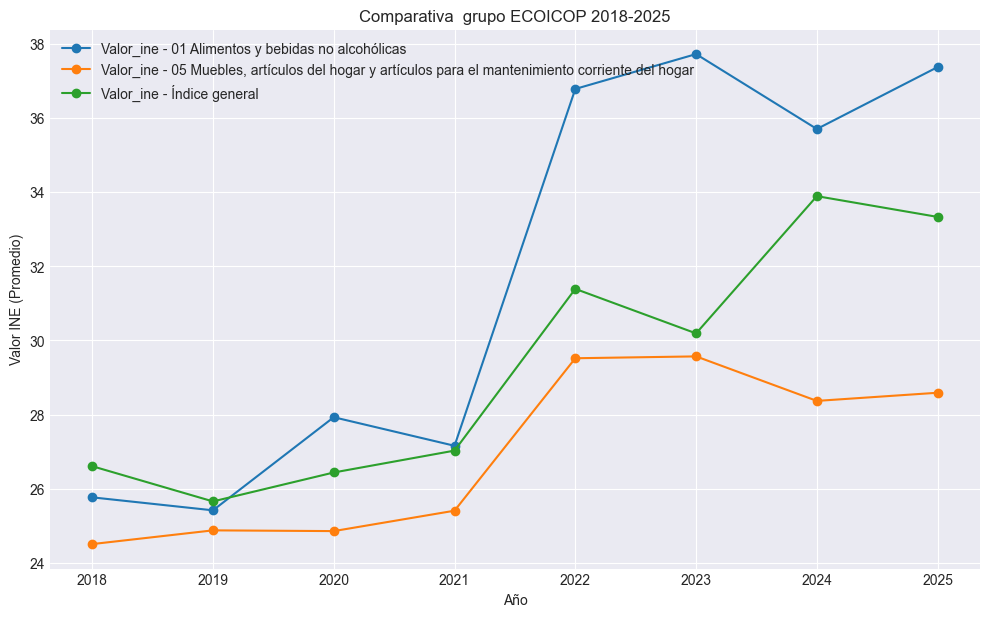

In [1179]:


analisis_grupos = analisis_grupos.reset_index()
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 7))

for grupo in analisis_grupos['Grupos ECOICOP'].unique():
    datos_grupo = analisis_grupos[analisis_grupos['Grupos ECOICOP'] == grupo]
    plt.plot(datos_grupo['Anyo'], datos_grupo['Valor_ine'], marker='o', label=f'Valor_ine - {grupo}')

plt.title("Comparativa  grupo ECOICOP 2018-2025")
plt.xlabel('Año')
plt.ylabel('Valor INE (Promedio)')
plt.legend(loc='best')
plt.xticks(analisis_grupos['Anyo'].unique().astype(int)) 
plt.grid(True)


plt.show()


Unamos los productos

In [1180]:
df_unidos=pd.merge(df_limpio,df8_final,on="seccion",how="inner")

In [1181]:
df_unidos

,nombre,precio_unidad,precio_bulk,categoria,seccion,Estudio,Producto,Madrid (Comunidad de) 2023,Madrid (Comunidad de) 2022,Madrid (Comunidad de) 2021,Madrid (Comunidad de) 2020,Madrid (Comunidad de) 2019,Madrid (Comunidad de) 2018
0,"Aceite de oliva 0,4º Hacendado",19.75,3.95,Aceite de oliva,"Aceite, especias y salsas",Cantidad total consumida,Aceite de oliva,"47875,1","49238,3","48373,1","53925,6","51149,6","61751,5"
1,"Aceite de oliva 0,4º Hacendado",19.75,3.95,Aceite de oliva,"Aceite, especias y salsas",Cantidad total consumida,Otros aceites,"21734,6","15308,5","14271,3","12129,6","15785,1","13019,4"
2,"Aceite de oliva 0,4º Hacendado",19.75,3.95,Aceite de oliva,"Aceite, especias y salsas",Cantidad consumida media por hogar,Aceite de oliva,"17,7","18,5","18,4","20,4","19,4","23,5"
3,"Aceite de oliva 0,4º Hacendado",19.75,3.95,Aceite de oliva,"Aceite, especias y salsas",Cantidad consumida media por hogar,Otros aceites,8,"5,8","5,4","4,6",6,5
4,"Aceite de oliva 0,4º Hacendado",19.75,3.95,Aceite de oliva,"Aceite, especias y salsas",Cantidad consumida media por persona,Aceite de oliva,"6,9","7,3","7,3","8,1","7,7","9,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56017,Néctar de guayaba Hacendado,1.30,1.30,Otros sabores,Zumos,Cantidad consumida media por hogar,Zumos de frutas y/o vegetales,"27,2","33,3","31,9","25,7","31,1","32,4"
56018,Néctar de guayaba Hacendado,1.30,1.30,Otros sabores,Zumos,Cantidad consumida media por persona,Zumos de frutas y/o vegetales,"10,7","13,2","12,6","10,2","12,4","13,1"
56019,Néctar de guayaba Hacendado,1.30,1.30,Otros sabores,Zumos,Cantidad consumida media por unidad de consumo,Zumos de frutas y/o vegetales,"15,9","19,6","18,8","15,2","18,5","19,4"
56020,Néctar de guayaba Hacendado,1.30,1.30,Otros sabores,Zumos,Gasto total,Zumos de frutas y/o vegetales,"107919,7","121182,6","106975,3","87369,2","102884,5","106634,7"


In [1091]:
F.informe(df_unidos)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56022 entries, 0 to 56021
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nombre                      56022 non-null  object 
 1   precio_unidad               56022 non-null  float64
 2   precio_bulk                 56022 non-null  float64
 3   categoria                   56022 non-null  object 
 4   seccion                     56022 non-null  object 
 5   Estudio                     56022 non-null  object 
 6   Producto                    56022 non-null  object 
 7   Madrid (Comunidad de) 2023  56022 non-null  object 
 8   Madrid (Comunidad de) 2022  56022 non-null  object 
 9   Madrid (Comunidad de) 2021  56022 non-null  object 
 10  Madrid (Comunidad de) 2020  56022 non-null  object 
 11  Madrid (Comunidad de) 2019  56022 non-null  object 
 12  Madrid (Comunidad de) 2018  56022 non-null  object 
dtypes: f

In [1092]:
F.datos_nulos(df_unidos)

datos nulos
nombre                        0
precio_unidad                 0
precio_bulk                   0
categoria                     0
seccion                       0
Estudio                       0
Producto                      0
Madrid (Comunidad de) 2023    0
Madrid (Comunidad de) 2022    0
Madrid (Comunidad de) 2021    0
Madrid (Comunidad de) 2020    0
Madrid (Comunidad de) 2019    0
Madrid (Comunidad de) 2018    0
dtype: int64
datos totales
nombre                        56022
precio_unidad                 56022
precio_bulk                   56022
categoria                     56022
seccion                       56022
Estudio                       56022
Producto                      56022
Madrid (Comunidad de) 2023    56022
Madrid (Comunidad de) 2022    56022
Madrid (Comunidad de) 2021    56022
Madrid (Comunidad de) 2020    56022
Madrid (Comunidad de) 2019    56022
Madrid (Comunidad de) 2018    56022
dtype: int64
porcentaje de nulos
nombre                        0.0
precio_uni

Veamos los productos de la canasta básica para el Instituto Nacional de Estadística (INE) organiza la canasta en categorías ECOICOP los grupos clave son:
Pan y cereales: (Ej: arroz, harina, pasta).
Lácteos, queso y huevos: (Leche, yogures).
Aceites y grasas: (Aceite de oliva y girasol).
Carnes y Pescados: (Pollo, cerdo, ternera y variedades frescas/congeladas).
Frutas y Legumbres/Hortalizas: Productos frescos de temporada.

Haremos el filtro por la sección.

In [1093]:
F.categorico(df_unidos,"seccion")

seccion
Fruta y verdura                  16524
Carne                             7560
Congelados                        3960
Azúcar, caramelos y chocolate     3384
Huevos, leche y mantequilla       3318
Panadería y pastelería            3180
Charcutería y quesos              3168
Aperitivos                        2448
Cacao, café e infusiones          2280
Agua y refrescos                  2208
Marisco y pescado                 2016
Aceite, especias y salsas         1524
Arroz, legumbres y pasta          1494
Cereales y galletas               1296
Postres y yogures                  816
Pizzas y platos preparados         612
Zumos                              234
Name: count, dtype: int64
['Aceite, especias y salsas' 'Agua y refrescos' 'Aperitivos'
 'Arroz, legumbres y pasta' 'Azúcar, caramelos y chocolate'
 'Cacao, café e infusiones' 'Carne' 'Cereales y galletas'
 'Charcutería y quesos' 'Congelados' 'Fruta y verdura'
 'Huevos, leche y mantequilla' 'Marisco y pescado'
 'Panadería y past

In [1094]:
canasta= ["Aceite, especias y salsas",'Arroz, legumbres y pasta', 'Carne', 'Fruta y verdura', 'Huevos, leche y mantequilla', 'Panadería y pastelería']

In [1095]:
df_estudio= F.filtrar_fila(df_unidos,"seccion",canasta)

cambiaremos las columnas de nombre


In [1096]:
df_estudio.rename(columns={'Madrid (Comunidad de) 2023': 'Madrid_2023','Madrid (Comunidad de) 2020': 'Madrid_2020','Madrid (Comunidad de) 2019': 'Madrid_2019','Madrid (Comunidad de) 2018': 'Madrid_2018','Madrid (Comunidad de) 2021': 'Madrid_2021','Madrid (Comunidad de) 2022': 'Madrid_2022'}, inplace=True)


C:\Users\tachi\AppData\Local\Temp\ipykernel_16476\1549645549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estudio.rename(columns={'Madrid (Comunidad de) 2023': 'Madrid_2023','Madrid (Comunidad de) 2020': 'Madrid_2020','Madrid (Comunidad de) 2019': 'Madrid_2019','Madrid (Comunidad de) 2018': 'Madrid_2018','Madrid (Comunidad de) 2021': 'Madrid_2021','Madrid (Comunidad de) 2022': 'Madrid_2022'}, inplace=True)


In [1097]:
df_estudio

,nombre,precio_unidad,precio_bulk,categoria,seccion,Estudio,Producto,Madrid_2023,Madrid_2022,Madrid_2021,Madrid_2020,Madrid_2019,Madrid_2018
0,"Aceite de oliva 0,4º Hacendado",19.75,3.95,Aceite de oliva,"Aceite, especias y salsas",Cantidad total consumida,Aceite de oliva,"47875,1","49238,3","48373,1","53925,6","51149,6","61751,5"
1,"Aceite de oliva 0,4º Hacendado",19.75,3.95,Aceite de oliva,"Aceite, especias y salsas",Cantidad total consumida,Otros aceites,"21734,6","15308,5","14271,3","12129,6","15785,1","13019,4"
2,"Aceite de oliva 0,4º Hacendado",19.75,3.95,Aceite de oliva,"Aceite, especias y salsas",Cantidad consumida media por hogar,Aceite de oliva,"17,7","18,5","18,4","20,4","19,4","23,5"
3,"Aceite de oliva 0,4º Hacendado",19.75,3.95,Aceite de oliva,"Aceite, especias y salsas",Cantidad consumida media por hogar,Otros aceites,8,"5,8","5,4","4,6",6,5
4,"Aceite de oliva 0,4º Hacendado",19.75,3.95,Aceite de oliva,"Aceite, especias y salsas",Cantidad consumida media por persona,Aceite de oliva,"6,9","7,3","7,3","8,1","7,7","9,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54355,Almendra palitos Hacendado,1.85,18.50,Decoración,Panadería y pastelería,Cantidad consumida media por unidad de consumo,Otros productos de panadería,"24,8","25,4","26,1","23,4","25,7","23,4"
54356,Almendra palitos Hacendado,1.85,18.50,Decoración,Panadería y pastelería,Gasto total,Pan,"611907,5",627635,"576884,2","558769,6","527689,7","504005,6"
54357,Almendra palitos Hacendado,1.85,18.50,Decoración,Panadería y pastelería,Gasto total,Otros productos de panadería,"780987,1","724791,2","627816,6","555896,2","613230,6","553036,7"
54358,Almendra palitos Hacendado,1.85,18.50,Decoración,Panadería y pastelería,Valor unitario,Pan,"2,8","2,6","2,5","2,5","2,3","2,3"


In [1098]:
df_nuevo = df_estudio[["seccion","categoria","Estudio","Producto","nombre","precio_unidad","precio_bulk","Madrid_2023","Madrid_2022","Madrid_2021","Madrid_2020","Madrid_2019","Madrid_2018"]]

In [1099]:
df_nuevo

,seccion,categoria,Estudio,Producto,nombre,precio_unidad,precio_bulk,Madrid_2023,Madrid_2022,Madrid_2021,Madrid_2020,Madrid_2019,Madrid_2018
0,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",19.75,3.95,"47875,1","49238,3","48373,1","53925,6","51149,6","61751,5"
1,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Otros aceites,"Aceite de oliva 0,4º Hacendado",19.75,3.95,"21734,6","15308,5","14271,3","12129,6","15785,1","13019,4"
2,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",19.75,3.95,"17,7","18,5","18,4","20,4","19,4","23,5"
3,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Otros aceites,"Aceite de oliva 0,4º Hacendado",19.75,3.95,8,"5,8","5,4","4,6",6,5
4,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por persona,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",19.75,3.95,"6,9","7,3","7,3","8,1","7,7","9,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54355,Panadería y pastelería,Decoración,Cantidad consumida media por unidad de consumo,Otros productos de panadería,Almendra palitos Hacendado,1.85,18.50,"24,8","25,4","26,1","23,4","25,7","23,4"
54356,Panadería y pastelería,Decoración,Gasto total,Pan,Almendra palitos Hacendado,1.85,18.50,"611907,5",627635,"576884,2","558769,6","527689,7","504005,6"
54357,Panadería y pastelería,Decoración,Gasto total,Otros productos de panadería,Almendra palitos Hacendado,1.85,18.50,"780987,1","724791,2","627816,6","555896,2","613230,6","553036,7"
54358,Panadería y pastelería,Decoración,Valor unitario,Pan,Almendra palitos Hacendado,1.85,18.50,"2,8","2,6","2,5","2,5","2,3","2,3"


In [1100]:
df_nuevo2=F.cambiocoma_punto(df_nuevo,"Madrid_2023")
df_nuevo2=F.cambiocoma_punto(df_nuevo,"Madrid_2022")
df_nuevo2=F.cambiocoma_punto(df_nuevo,"Madrid_2021")
df_nuevo2=F.cambiocoma_punto(df_nuevo,"Madrid_2020")
df_nuevo2=F.cambiocoma_punto(df_nuevo,"Madrid_2019")
df_nuevo2=F.cambiocoma_punto(df_nuevo,"Madrid_2018")


In [1101]:
df_nuevo2

,seccion,categoria,Estudio,Producto,nombre,precio_unidad,precio_bulk,Madrid_2023,Madrid_2022,Madrid_2021,Madrid_2020,Madrid_2019,Madrid_2018
0,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",19.75,3.95,47875.1,49238.3,48373.1,53925.6,51149.6,61751.5
1,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Otros aceites,"Aceite de oliva 0,4º Hacendado",19.75,3.95,21734.6,15308.5,14271.3,12129.6,15785.1,13019.4
2,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",19.75,3.95,17.7,18.5,18.4,20.4,19.4,23.5
3,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Otros aceites,"Aceite de oliva 0,4º Hacendado",19.75,3.95,8.0,5.8,5.4,4.6,6.0,5.0
4,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por persona,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",19.75,3.95,6.9,7.3,7.3,8.1,7.7,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54355,Panadería y pastelería,Decoración,Cantidad consumida media por unidad de consumo,Otros productos de panadería,Almendra palitos Hacendado,1.85,18.50,24.8,25.4,26.1,23.4,25.7,23.4
54356,Panadería y pastelería,Decoración,Gasto total,Pan,Almendra palitos Hacendado,1.85,18.50,611907.5,627635.0,576884.2,558769.6,527689.7,504005.6
54357,Panadería y pastelería,Decoración,Gasto total,Otros productos de panadería,Almendra palitos Hacendado,1.85,18.50,780987.1,724791.2,627816.6,555896.2,613230.6,553036.7
54358,Panadería y pastelería,Decoración,Valor unitario,Pan,Almendra palitos Hacendado,1.85,18.50,2.8,2.6,2.5,2.5,2.3,2.3


Ahora haremos un promedio de todos los estudios para crear una nueva columna llamada "Promedio_madrid 5años"

In [1102]:
columnas_años = ['Madrid_2023', 'Madrid_2022', 'Madrid_2021', 'Madrid_2020', 'Madrid_2019', 'Madrid_2018']

In [1103]:
df_nuevo2['Promedio_Madrid'] = df_nuevo2[columnas_años].mean(axis=1).round(2)

In [1104]:
df_nuevo2.head()

,seccion,categoria,Estudio,Producto,nombre,precio_unidad,precio_bulk,Madrid_2023,Madrid_2022,Madrid_2021,Madrid_2020,Madrid_2019,Madrid_2018,Promedio_Madrid
0,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",19.75,3.95,47875.1,49238.3,48373.1,53925.6,51149.6,61751.5,52052.20
1,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Otros aceites,"Aceite de oliva 0,4º Hacendado",19.75,3.95,21734.6,15308.5,14271.3,12129.6,15785.1,13019.4,15374.75
2,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",19.75,3.95,17.7,18.5,18.4,20.4,19.4,23.5,19.65
3,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Otros aceites,"Aceite de oliva 0,4º Hacendado",19.75,3.95,8.0,5.8,5.4,4.6,6.0,5.0,5.80
4,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por persona,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",19.75,3.95,6.9,7.3,7.3,8.1,7.7,9.5,7.80


In [1105]:
df_edit=df_nuevo2[["seccion","categoria","Estudio","Producto","nombre","precio_bulk","Promedio_Madrid"]]

In [1106]:
df_edit

,seccion,categoria,Estudio,Producto,nombre,precio_bulk,Promedio_Madrid
0,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,52052.20
1,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Otros aceites,"Aceite de oliva 0,4º Hacendado",3.95,15374.75
2,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,19.65
3,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Otros aceites,"Aceite de oliva 0,4º Hacendado",3.95,5.80
4,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por persona,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,7.80
...,...,...,...,...,...,...,...
54355,Panadería y pastelería,Decoración,Cantidad consumida media por unidad de consumo,Otros productos de panadería,Almendra palitos Hacendado,18.50,24.80
54356,Panadería y pastelería,Decoración,Gasto total,Pan,Almendra palitos Hacendado,18.50,567815.27
54357,Panadería y pastelería,Decoración,Gasto total,Otros productos de panadería,Almendra palitos Hacendado,18.50,642626.40
54358,Panadería y pastelería,Decoración,Valor unitario,Pan,Almendra palitos Hacendado,18.50,2.50


In [1182]:
F.categorico(df_edit,"categoria")

categoria
Otras verduras y hortalizas    2916
Lechuga                        2160
Pollo                          1806
Cerdo                          1470
Tomate                         1404
                               ... 
Allioli                          36
Picatostes                       36
Mostaza                          24
Otros aceites                    24
Tartas                           12
Name: count, Length: 92, dtype: int64
['Aceite de oliva' 'Vinagre y otros aderezos' 'Otros aceites'
 'Sal y bicarbonato' 'Hierbas' 'Colorante y pimentón' 'Pimienta'
 'Otras especias' 'Sazonadores' 'Mayonesa' 'Ketchup' 'Mostaza' 'Allioli'
 'Tomate frito' 'Salsas para carnes' 'Salsas para pasta'
 'Salsas orientales' 'Otras salsas' 'Arroz' 'Garbanzos' 'Alubias'
 'Lentejas y otros' 'Fideos' 'Macarrones, pajaritas y hélices'
 'Spaghetti y tallarines' 'Pasta rellena' 'Fideos orientales'
 'Lasaña y canelones' 'Arreglos' 'Pavo y otras aves' 'Pollo'
 'Carne congelada' 'Cerdo' 'Conejo' 'Cordero' '

filtramos por categoria


In [1183]:
filas= ['Aceite de oliva', 'Otros aceites', 'Sal y bicarbonato' , 'Tomate frito' ,'Arroz' ,'Garbanzos' ,'Alubias','Lentejas y otros','Fideos','Macarrones, pajaritas y hélices', 'Spaghetti y tallarines' , 'Pollo'
,'Carne congelada','Cerdo'  ,'Embutido', 'Hamburguesas', 'Picadas y otros', 'Vacuno', 'Plátano y uva', 'Manzana y pera', 'Cítricos' ,'Lechuga', 'Patata','Cebolla y ajo', 'Tomate', 'Pepino y zanahoria' ,'Calabacín y pimiento' ,'Repollo y col'
,'Setas y champiñones' ,'Otras verduras y hortalizas', 'Huevos' ,'Leche semidesnatada' ,'Leche desnatada','Leche entera' ,'Leche Infantil', 'Mantequilla' ,'Margarina' ,'Nata','Harina' , 'Barra de pan' , 'Pan de bocadillo' ,'Pan rebanado', 'Pan de molde', 'Otros panes']

In [1184]:
df_edit=F.espacios(df_edit,"categoria")

c:\Users\tachi\Documents\git\proyecto3\Funciones.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.strip()


In [1185]:
df_edit

,seccion,categoria,Estudio,Producto,nombre,precio_bulk,Promedio_Madrid
0,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,52052.20
1,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Otros aceites,"Aceite de oliva 0,4º Hacendado",3.95,15374.75
2,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,19.65
3,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Otros aceites,"Aceite de oliva 0,4º Hacendado",3.95,5.80
4,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por persona,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,7.80
...,...,...,...,...,...,...,...
54355,Panadería y pastelería,Decoración,Cantidad consumida media por unidad de consumo,Otros productos de panadería,Almendra palitos Hacendado,18.50,24.80
54356,Panadería y pastelería,Decoración,Gasto total,Pan,Almendra palitos Hacendado,18.50,567815.27
54357,Panadería y pastelería,Decoración,Gasto total,Otros productos de panadería,Almendra palitos Hacendado,18.50,642626.40
54358,Panadería y pastelería,Decoración,Valor unitario,Pan,Almendra palitos Hacendado,18.50,2.50


In [1186]:
F.categorico(df_edit,"Producto")

Producto
Pan                                                                                                        1590
Otros productos de panadería                                                                               1590
Carne de porcino                                                                                           1080
Carne de ave                                                                                               1080
Carne de ovino y caprino                                                                                   1080
Carne de vacuno                                                                                            1080
Carne procesada y otras preparaciones a base de carne                                                      1080
Otras carnes                                                                                               1080
Despojos y menudillos                                                                          

In [1187]:
F.categorico(df_edit,"nombre")

nombre
Pomelo                                              108
Lima                                                108
Kiwi verde                                          108
Plátano de Canarias IGP                             108
Banana                                              108
                                                   ... 
Picos Hacendado                                      12
Picos 100% integrales Hacendado                      12
Picos saladitos Hacendado                            12
Galletas saladas de semillas y orégano Hacendado     12
Almendra palitos Hacendado                           12
Name: count, Length: 887, dtype: int64
['Aceite de oliva 0,4º Hacendado' 'Aceite de oliva virgen extra Hacendado'
 'Aceite de oliva virgen extra Hacendado Gran Selección'
 'Aceite de oliva 1º Hacendado' 'Aceite de oliva virgen Hacendado'
 'Aceite de oliva virgen extra Picual Casa Juncal'
 'Vinagre de vino blanco Hacendado' 'Vinagre de manzana Hacendado'
 'Limón exprimido Hac

In [1188]:
df_edit2

,seccion,categoria,Estudio,Producto,nombre,precio_bulk,Promedio_Madrid
0,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,52052.20
1,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Otros aceites,"Aceite de oliva 0,4º Hacendado",3.95,15374.75
2,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,19.65
3,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Otros aceites,"Aceite de oliva 0,4º Hacendado",3.95,5.80
4,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por persona,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,7.80
...,...,...,...,...,...,...,...
54355,Panadería y pastelería,Decoración,Cantidad consumida media por unidad de consumo,Otros productos de panadería,Pan y cereales,18.50,24.80
54356,Panadería y pastelería,Decoración,Gasto total,Pan,Pan y cereales,18.50,567815.27
54357,Panadería y pastelería,Decoración,Gasto total,Otros productos de panadería,Pan y cereales,18.50,642626.40
54358,Panadería y pastelería,Decoración,Valor unitario,Pan,Pan y cereales,18.50,2.50


In [1189]:
F.categorico(df_edit2,"Producto")

Producto
Pan                                                                                                        1590
Otros productos de panadería                                                                               1590
Carne de porcino                                                                                           1080
Carne de ave                                                                                               1080
Carne de ovino y caprino                                                                                   1080
Carne de vacuno                                                                                            1080
Carne procesada y otras preparaciones a base de carne                                                      1080
Otras carnes                                                                                               1080
Despojos y menudillos                                                                          

In [1190]:
F.categorico(df_edit2,"categoria")

categoria
Otras verduras y hortalizas    2916
Lechuga                        2160
Pollo                          1806
Cerdo                          1470
Tomate                         1404
                               ... 
Allioli                          36
Picatostes                       36
Mostaza                          24
Otros aceites                    24
Tartas                           12
Name: count, Length: 92, dtype: int64
['Aceite de oliva' 'Vinagre y otros aderezos' 'Otros aceites'
 'Sal y bicarbonato' 'Hierbas' 'Colorante y pimentón' 'Pimienta'
 'Otras especias' 'Sazonadores' 'Mayonesa' 'Ketchup' 'Mostaza' 'Allioli'
 'Tomate frito' 'Salsas para carnes' 'Salsas para pasta'
 'Salsas orientales' 'Otras salsas' 'Arroz' 'Garbanzos' 'Alubias'
 'Lentejas y otros' 'Fideos' 'Macarrones, pajaritas y hélices'
 'Spaghetti y tallarines' 'Pasta rellena' 'Fideos orientales'
 'Lasaña y canelones' 'Arreglos' 'Pavo y otras aves' 'Pollo'
 'Carne congelada' 'Cerdo' 'Conejo' 'Cordero' '

In [1191]:
F.categorico(df_edit2,"nombre")

nombre
Pan y cereales                   3180
Verduras                         1836
Pera Conferencia                   96
Manzanas rojas dulces              96
Pera Ercolina                      96
                                 ... 
Orégano Hacendado                  12
Perejil Hacendado                  12
Hoja de laurel Hacendado           12
Hierbas provenzales Hacendado      12
Albahaca Hacendado                 12
Name: count, Length: 624, dtype: int64
['Aceite de oliva 0,4º Hacendado' 'Aceite de oliva virgen extra Hacendado'
 'Aceite de oliva virgen extra Hacendado Gran Selección'
 'Aceite de oliva 1º Hacendado' 'Aceite de oliva virgen Hacendado'
 'Aceite de oliva virgen extra Picual Casa Juncal'
 'Vinagre de vino blanco Hacendado' 'Vinagre de manzana Hacendado'
 'Limón exprimido Hacendado'
 'Crema de vinagre balsámico de Módena Hacendado'
 'Vinagre de Jerez reserva Hacendado'
 'Reducción bálsamica de vinagre Pedro Ximénez Hacendado'
 'Vinagre balsámico de Módena Hacendado'
 'A

In [1192]:
df_nuevo3=F.filtrar_fila(df_edit2, "categoria",filas)

In [1193]:
df_nuevo3

,seccion,categoria,Estudio,Producto,nombre,precio_bulk,Promedio_Madrid
0,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,52052.20
1,"Aceite, especias y salsas",Aceite de oliva,Cantidad total consumida,Otros aceites,"Aceite de oliva 0,4º Hacendado",3.95,15374.75
2,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,19.65
3,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por hogar,Otros aceites,"Aceite de oliva 0,4º Hacendado",3.95,5.80
4,"Aceite, especias y salsas",Aceite de oliva,Cantidad consumida media por persona,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,7.80
...,...,...,...,...,...,...,...
53287,Panadería y pastelería,Otros panes,Cantidad consumida media por unidad de consumo,Otros productos de panadería,Pan y cereales,2.71,24.80
53288,Panadería y pastelería,Otros panes,Gasto total,Pan,Pan y cereales,2.71,567815.27
53289,Panadería y pastelería,Otros panes,Gasto total,Otros productos de panadería,Pan y cereales,2.71,642626.40
53290,Panadería y pastelería,Otros panes,Valor unitario,Pan,Pan y cereales,2.71,2.50


In [1194]:
F.categorico(df_nuevo3,"Estudio")

Estudio
Cantidad total consumida                          3835
Cantidad consumida media por hogar                3835
Cantidad consumida media por persona              3835
Cantidad consumida media por unidad de consumo    3835
Gasto total                                       3835
Valor unitario                                    3835
Name: count, dtype: int64
['Cantidad total consumida' 'Cantidad consumida media por hogar'
 'Cantidad consumida media por persona'
 'Cantidad consumida media por unidad de consumo' 'Gasto total'
 'Valor unitario']
6


Probaremos invertir el data frame para que el estudio sean las columnas de estudio y sin repeticiones

In [1195]:
df_nuevo3=df_nuevo3.rename(columns={'precio_bulk': 'precio_mercadona'})

In [1196]:
df_pivotado = df_nuevo3.pivot_table(
    index=['seccion', 'categoria', 'Producto', 'nombre', 'precio_mercadona'],
    columns='Estudio',
    values='Promedio_Madrid', 
    aggfunc='first' 
).reset_index()


In [1197]:
df_pivotado

Estudio,seccion,categoria,Producto,nombre,precio_mercadona,Cantidad consumida media por hogar,Cantidad consumida media por persona,Cantidad consumida media por unidad de consumo,Cantidad total consumida,Gasto total,Valor unitario
0,"Aceite, especias y salsas",Aceite de oliva,Aceite de oliva,"Aceite de oliva 0,4º Hacendado",3.95,19.65,7.80,11.60,52052.20,215135.30,4.17
1,"Aceite, especias y salsas",Aceite de oliva,Aceite de oliva,Aceite de oliva 1º Hacendado,4.17,19.65,7.80,11.60,52052.20,215135.30,4.17
2,"Aceite, especias y salsas",Aceite de oliva,Aceite de oliva,Aceite de oliva virgen Hacendado,4.28,19.65,7.80,11.60,52052.20,215135.30,4.17
3,"Aceite, especias y salsas",Aceite de oliva,Aceite de oliva,Aceite de oliva virgen extra Hacendado,4.85,19.65,7.80,11.60,52052.20,215135.30,4.17
4,"Aceite, especias y salsas",Aceite de oliva,Aceite de oliva,Aceite de oliva virgen extra Hacendado Gran Se...,7.93,19.65,7.80,11.60,52052.20,215135.30,4.17
...,...,...,...,...,...,...,...,...,...,...,...
3800,Panadería y pastelería,Pan rebanado,Pan,Pan y cereales,2.65,85.85,34.05,50.68,227366.32,567815.27,2.50
3801,Panadería y pastelería,Pan rebanado,Pan,Pan y cereales,2.85,85.85,34.05,50.68,227366.32,567815.27,2.50
3802,Panadería y pastelería,Pan rebanado,Pan,Pan y cereales,3.40,85.85,34.05,50.68,227366.32,567815.27,2.50
3803,Panadería y pastelería,Pan rebanado,Pan,Pan y cereales,3.96,85.85,34.05,50.68,227366.32,567815.27,2.50


Creamos un data frame más pequeño por estudio determinando los valores de precios de Mercadona y los entregados en promedio por la encuestaen base a la canasta básica.

In [1198]:
agrupado = df_pivotado.groupby('seccion')[["precio_mercadona","Valor unitario","Gasto total"]].agg('mean').reset_index().round(2)

In [1199]:
agrupado

Estudio,seccion,precio_mercadona,Valor unitario,Gasto total
0,"Aceite, especias y salsas",4.82,2.92,120774.10
1,"Arroz, legumbres y pasta",2.78,1.87,61135.65
2,Carne,9.41,8.55,248879.99
3,Fruta y verdura,4.79,2.81,125877.44
4,"Huevos, leche y mantequilla",3.30,3.01,102494.46
5,Panadería y pastelería,3.47,4.14,605220.84


Agregamos una nueva columna con el gasto promedio mensual de los productos


In [1200]:
agrupado['Promedio mensual gasto'] = (agrupado['Gasto total'] / 12).round(2)


In [1201]:
agrupado

Estudio,seccion,precio_mercadona,Valor unitario,Gasto total,Promedio mensual gasto
0,"Aceite, especias y salsas",4.82,2.92,120774.10,10064.51
1,"Arroz, legumbres y pasta",2.78,1.87,61135.65,5094.64
2,Carne,9.41,8.55,248879.99,20740.00
3,Fruta y verdura,4.79,2.81,125877.44,10489.79
4,"Huevos, leche y mantequilla",3.30,3.01,102494.46,8541.20
5,Panadería y pastelería,3.47,4.14,605220.84,50435.07


Si consideramos que los hogares estan compuestos por 4 personas promedio y que la encuesta se realizo aproximandamente a 1000 familias se pueden calcular los gastos mensuales promedio de cada hogar.

In [1202]:
agrupado['Prom mensual por hogar'] = (agrupado['Promedio mensual gasto'] / 1000).round(2)

In [1203]:
agrupado

Estudio,seccion,precio_mercadona,Valor unitario,Gasto total,Promedio mensual gasto,Prom mensual por hogar
0,"Aceite, especias y salsas",4.82,2.92,120774.10,10064.51,10.06
1,"Arroz, legumbres y pasta",2.78,1.87,61135.65,5094.64,5.09
2,Carne,9.41,8.55,248879.99,20740.00,20.74
3,Fruta y verdura,4.79,2.81,125877.44,10489.79,10.49
4,"Huevos, leche y mantequilla",3.30,3.01,102494.46,8541.20,8.54
5,Panadería y pastelería,3.47,4.14,605220.84,50435.07,50.44


Haremos las sumas totales para determinar el valor aproximado de la canasta básica.

In [1204]:
columnas_numericas = ['precio_mercadona','Valor unitario','Gasto total','Promedio mensual gasto','Prom mensual por hogar']


In [1205]:
totales = agrupado[columnas_numericas].sum(axis=0)

In [1206]:
totales

Estudio
precio_mercadona               28.57
Valor unitario                 23.30
Gasto total               1264382.48
Promedio mensual gasto     105365.21
Prom mensual por hogar        105.36
dtype: float64

In [1207]:
df_total = pd.DataFrame(totales).transpose()

In [1208]:
df_total

Estudio,precio_mercadona,Valor unitario,Gasto total,Promedio mensual gasto,Prom mensual por hogar
0,28.57,23.3,1264382.48,105365.21,105.36


In [1209]:
df_final = pd.concat([agrupado, df_total], ignore_index=True)


In [1210]:
df_final

Estudio,seccion,precio_mercadona,Valor unitario,Gasto total,Promedio mensual gasto,Prom mensual por hogar
0,"Aceite, especias y salsas",4.82,2.92,120774.10,10064.51,10.06
1,"Arroz, legumbres y pasta",2.78,1.87,61135.65,5094.64,5.09
2,Carne,9.41,8.55,248879.99,20740.00,20.74
3,Fruta y verdura,4.79,2.81,125877.44,10489.79,10.49
4,"Huevos, leche y mantequilla",3.30,3.01,102494.46,8541.20,8.54
5,Panadería y pastelería,3.47,4.14,605220.84,50435.07,50.44
6,NaN,28.57,23.30,1264382.48,105365.21,105.36


In [1211]:
df_final2=F.completar_nulos(df_final,'seccion',"Total canasta básica")

In [1212]:
df_final2[["seccion","precio_mercadona","Valor unitario","Prom mensual por hogar"]]

Estudio,seccion,precio_mercadona,Valor unitario,Prom mensual por hogar
0,"Aceite, especias y salsas",4.82,2.92,10.06
1,"Arroz, legumbres y pasta",2.78,1.87,5.09
2,Carne,9.41,8.55,20.74
3,Fruta y verdura,4.79,2.81,10.49
4,"Huevos, leche y mantequilla",3.30,3.01,8.54
5,Panadería y pastelería,3.47,4.14,50.44
6,Total canasta básica,28.57,23.30,105.36


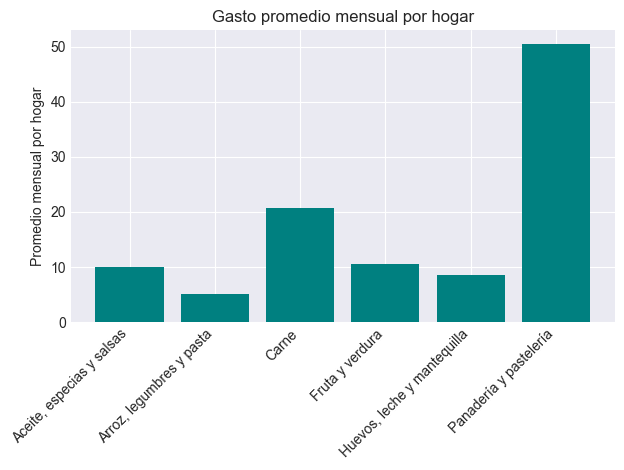

In [1213]:
plt.bar(agrupado['seccion'], agrupado['Prom mensual por hogar'], color='teal')
plt.title("Gasto promedio mensual por hogar")
plt.ylabel("Promedio mensual por hogar")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 